**Import modules**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import os
import warnings
import numpy as np
%matplotlib inline

pd.set_option('Display.max_rows',None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

**Dataset description**

| Column Name                                 | Description                                                                          |
|---------------------------------------------|--------------------------------------------------------------------------------------|
| Manufacturer                                | The company that produced the vehicle.                                               |
| Model Year                                  | The year in which the vehicle model was manufactured.                                |
| Regulatory Class                            | The regulatory category under which the vehicle falls (e.g., Passenger Car, Light Truck). |
| Vehicle Type                                | The type of vehicle (e.g., Sedan, SUV, Truck).                                        |
| Production (000)                            | The production volume of the vehicle model in thousands.                              |
| Production Share                            | The percentage share of this vehicle model in total production.                       |
| 2-Cycle MPG                                 | The vehicle's fuel efficiency as per 2-cycle testing method.                          |
| Real-World MPG                              | The vehicle's fuel efficiency in real-world driving conditions.                       |
| Real-World MPG_City                         | The vehicle's fuel efficiency in city driving conditions in real-world.               |
| Real-World MPG_Hwy                          | The vehicle's fuel efficiency in highway driving conditions in real-world.            |
| Real-World CO2 (g/mi)                       | The amount of CO2 emissions produced by the vehicle per mile in real-world conditions. |
| Real-World CO2_City (g/mi)                  | The amount of CO2 emissions produced by the vehicle per mile in city driving conditions.|
| Real-World CO2_Hwy (g/mi)                   | The amount of CO2 emissions produced by the vehicle per mile in highway driving conditions.|
| Weight (lbs)                                | The weight of the vehicle in pounds.                                                  |
| Footprint (sq. ft.)                         | The vehicle's footprint in square feet, a measure of its size.                        |
| Engine Displacement                         | The displacement volume of the vehicle's engine, usually in liters.                   |
| Horsepower (HP)                             | The power output of the vehicle's engine in horsepower.                               |
| Acceleration (0-60 time in seconds)         | The time it takes for the vehicle to accelerate from 0 to 60 miles per hour.          |
| HP/Engine Displacement                      | The ratio of horsepower to engine displacement.                                       |
| HP/Weight (lbs)                             | The ratio of horsepower to the vehicle's weight.                                      |
| Ton-MPG (Real-World)                        | The vehicle's fuel efficiency in ton-miles per gallon in real-world conditions.       |
| Drivetrain - Front                          | Indicates if the vehicle has front-wheel drive.                                       |
| Drivetrain - 4WD                            | Indicates if the vehicle has four-wheel drive.                                        |
| Drivetrain - Rear                           | Indicates if the vehicle has rear-wheel drive.                                        |
| Transmission - Manual                       | Indicates if the vehicle has a manual transmission.                                   |
| Transmission - Automatic                    | Indicates if the vehicle has an automatic transmission.                               |
| Transmission - Lockup                       | Indicates if the vehicle has a lockup transmission.                                   |
| Transmission - CVT (Hybrid)                 | Indicates if the vehicle has a continuously variable transmission (CVT) for hybrids.  |
| Transmission - Other                        | Indicates if the vehicle has a different type of transmission.                        |
| Fuel Delivery - Carbureted                  | Indicates if the vehicle uses a carbureted fuel delivery system.                      |
| Fuel Delivery - Gasoline Direct Injection (GDI) | Indicates if the vehicle uses gasoline direct injection.                             |
| Fuel Delivery - Port Fuel Injection         | Indicates if the vehicle uses port fuel injection.                                    |
| Fuel Delivery - Throttle Body Injection     | Indicates if the vehicle uses throttle body injection.                                |
| Fuel Delivery - Other                       | Indicates if the vehicle uses a different type of fuel delivery system.               |
| Powertrain - Diesel                         | Indicates if the vehicle uses a diesel powertrain.                                    |
| Powertrain - Electric Vehicle (EV)          | Indicates if the vehicle is an electric vehicle.                                      |
| Powertrain - Plug-in Hybrid Electric Vehicle (PHEV) | Indicates if the vehicle is a plug-in hybrid electric vehicle.                     |
| Powertrain - Fuel Cell Vehicle (FCV)        | Indicates if the vehicle is a fuel cell vehicle.                                      |
| Powertrain - Other (incl. CNG)              | Indicates if the vehicle uses a different type of powertrain, including compressed natural gas (CNG). |
| Powertrain - Gasoline Hybrid                | Indicates if the vehicle is a gasoline hybrid.                                        |
| Powertrain - Gasoline                       | Indicates if the vehicle uses a gasoline powertrain.                                  |
| Turbocharged Engine                         | Indicates if the vehicle has a turbocharged engine.                                   |
| Stop/Start                                  | Indicates if the vehicle has a stop/start system to save fuel.                        |
| Cylinder Deactivation                       | Indicates if the vehicle can deactivate some of its cylinders to save fuel.           |
| Multivalve Engine                           | Indicates if the vehicle has an engine with multiple valves per cylinder.             |
| Variable Valve Timing                       | Indicates if the vehicle has a variable valve timing system.                          |
| Average Number of Gears                     | The average number of gears in the vehicle's transmission.                            |
| Transmission - CVT (Non-Hybrid)             | Indicates if the vehicle has a continuously variable transmission (CVT) for non-hybrids.|
| 4 or Fewer Gears                            | Indicates if the vehicle's transmission has four or fewer gears.                      |
| 5 Gears                                     | Indicates if the vehicle's transmission has five gears.                               |
| 6 Gears                                     | Indicates if the vehicle's transmission has six gears.                                |
| 7 Gears                                     | Indicates if the vehicle's transmission has seven gears.                              |
| 8 Gears                                     | Indicates if the vehicle's transmission has eight gears.                              |
| 9 or More Gears                             | Indicates if the vehicle's transmission has nine or more gears.                       |


**DATA WRANGLING**

In [3]:
bard_data = pd.read_excel("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/raw/Untitled spreadsheet.xlsx")
bard_data.head()

Manufacturer Model Year Regulatory Class Vehicle Type Production (000)  \
0          All       1975              All          All            10224   
1          All       1976              All          All            12334   
2          All       1977              All          All            14123   
3          All       1978              All          All            14448   
4          All       1979              All          All            13882   

  Production Share 2-Cycle MPG Real-World MPG Real-World MPG_City  \
0                1      15.333        13.0597            12.01552   
1                1    16.70719       14.22136            13.18117   
2                1    17.70553       15.06743             14.0058   
3                1    18.60678       15.83777            14.68193   
4                1    18.69594       15.91271            14.87711   

  Real-World MPG_Hwy Real-World CO2 (g/mi) Real-World CO2_City (g/mi)  \
0           14.61167             680.59612                    739.738   
1           15.73946             625.02238                  674.34147   
2           16.60587              589.9988                  634.71366   
3            17.5239             561.62442                  605.82637   
4           17.39245             559.69495                  598.63764   

  Real-World CO2_Hwy (g/mi) Weight (lbs) Footprint (sq. ft.)  \
0                  608.3116     4060.399                   -   
1                 564.74348     4079.198                   -   
2                 535.34732     3981.818                   -   
3                 507.59981     3715.238                   -   
4                 512.09833     3655.465                   -   

  Engine Displacement Horsepower (HP) Acceleration (0-60 time in seconds)  \
0            292.6905        137.3346                                   -   
1            293.5049        135.0839                                   -   
2            286.9026        135.9847                                   -   
3            265.6693        129.0248                             13.6221   
4            251.6963        123.5922                             14.6176   

  HP/Engine Displacement HP/Weight (lbs) Ton-MPG (Real-World)  \
0               0.507375        0.033475             26.90068   
1               0.492877        0.032768             29.32518   
2                0.50958        0.033904             30.37961   
3                0.52511        0.034391             29.88164   
4               0.531586        0.033539             29.52594   

  Drivetrain - Front Drivetrain - 4WD Drivetrain - Rear Transmission - Manual  \
0              0.053            0.033             0.914                  0.23   
1              0.046            0.048             0.906                 0.209   
2              0.055            0.047             0.898                 0.198   
3              0.074            0.066              0.86                 0.227   
4              0.092            0.043             0.865                 0.242   

  Transmission - Automatic Transmission - Lockup Transmission - CVT (Hybrid)  \
0                    0.768                 0.002                           -   
1                    0.791                     -                           -   
2                    0.802                     -                           -   
3                    0.719                 0.055                           -   
4                    0.681                 0.073                           -   

  Transmission - Other Fuel Delivery - Carbureted  \
0                    -                      0.957   
1                    -                      0.973   
2                    -                      0.962   
3                    -                      0.952   
4                0.004                      0.942   

  Fuel Delivery - Gasoline Direct Injection (GDI)  \
0                                               -   
1                                               -   
2     

**Data Quality Assessment and Cleaning**

In [4]:
bard_data.shape #numbers of rows and columns

(5280, 54)

In [5]:
bard_data.isna().sum()

Manufacturer                                           0
Model Year                                             0
Regulatory Class                                       0
Vehicle Type                                           0
Production (000)                                       0
Production Share                                       0
2-Cycle MPG                                            0
Real-World MPG                                         0
Real-World MPG_City                                    0
Real-World MPG_Hwy                                     0
Real-World CO2 (g/mi)                                  0
Real-World CO2_City (g/mi)                             0
Real-World CO2_Hwy (g/mi)                              0
Weight (lbs)                                           0
Footprint (sq. ft.)                                    0
Engine Displacement                                    0
Horsepower (HP)                                        0
Acceleration (0-60 time in seco

In [6]:
column_mapping = {}

for old_column in bard_data.columns:
    new_column = old_column.replace(' ','-').replace('-','_')
    
    column_mapping[old_column] = new_column
    
bard_data = bard_data.rename(columns=column_mapping)

In [7]:
bard_data.select_dtypes(include='object').nunique()

Manufacturer                                             15
Model_Year                                               48
Regulatory_Class                                          3
Vehicle_Type                                              8
Production_(000)                                       1540
Production_Share                                        393
2_Cycle_MPG                                            3477
Real_World_MPG                                         3485
Real_World_MPG_City                                    3477
Real_World_MPG_Hwy                                     3487
Real_World_CO2_(g/mi)                                  3455
Real_World_CO2_City_(g/mi)                             3450
Real_World_CO2_Hwy_(g/mi)                              3455
Weight_(lbs)                                           3182
Footprint_(sq._ft.)                                    1319
Engine_Displacement                                    3148
Horsepower_(HP)                         

- Segment the Model year

In [8]:
def segment_model(Model_Year):
    try:
        
        Model_Year = str(Model_Year).strip()
        Model_Year = int(Model_Year)    
        if Model_Year in range(1975, 1999):
            return "Old_Model"
        elif Model_Year in range(2000, 2010):
            return "Modern_Model"
        elif Model_Year in range(2011, 2023):  
            return "Recent_Model"
        else:
            return 'Other'
    except (ValueError,TypeError):
        return 'Other'

bard_data['Model_Year'] = bard_data['Model_Year'].apply(segment_model)


In [9]:
bard_data['Model_Year'].value_counts()

Model_Year
Old_Model       2640
Recent_Model    1210
Modern_Model    1100
Other            330
Name: count, dtype: int64

In [10]:
bard_data['Manufacturer'].unique()

array(['All', 'Ford', 'Hyundai', 'Kia', 'GM', 'Honda', 'BMW', 'VW',
       'Toyota', 'Nissan', 'Tesla', 'Stellantis', 'Mazda', 'Mercedes',
       'Subaru'], dtype=object)

In [11]:
bard_data = bard_data[bard_data['Manufacturer'] != 'All']

bard_data['Manufacturer'].unique()

array(['Ford', 'Hyundai', 'Kia', 'GM', 'Honda', 'BMW', 'VW', 'Toyota',
       'Nissan', 'Tesla', 'Stellantis', 'Mazda', 'Mercedes', 'Subaru'],
      dtype=object)

In [12]:
bard_data = bard_data[bard_data['Regulatory_Class'] != 'All']

bard_data['Regulatory_Class'].unique()

array(['Car', 'Truck'], dtype=object)

In [13]:
bard_data = bard_data[~bard_data.isin(['All']).any(axis=1)]

In [14]:

bard_data['Manufacturer'].value_counts().sort_index()

Manufacturer
BMW           240
Ford          336
GM            336
Honda         336
Hyundai       240
Kia           288
Mazda         336
Mercedes      288
Nissan        336
Stellantis    336
Subaru        240
Tesla         240
Toyota        336
VW            336
Name: count, dtype: int64

In [15]:
bard_data = bard_data[~bard_data['Vehicle_Type'].isin(['All Car', 'All Truck'])]
unique_vehicle_types = bard_data['Vehicle_Type'].unique()


In [16]:

bard_data['Vehicle_Type'].value_counts()

Vehicle_Type
Sedan/Wagon    672
Truck SUV      672
Car SUV        624
Minivan/Van    480
Pickup         432
Name: count, dtype: int64

In [17]:
bard_data = bard_data.replace('-', np.nan)

In [18]:
bard_data = bard_data.reset_index(drop=True)

In [19]:
bard_data['Vehicle_Type'].nunique()

5

In [20]:
bard_data.columns

Index(['Manufacturer', 'Model_Year', 'Regulatory_Class', 'Vehicle_Type',
       'Production_(000)', 'Production_Share', '2_Cycle_MPG', 'Real_World_MPG',
       'Real_World_MPG_City', 'Real_World_MPG_Hwy', 'Real_World_CO2_(g/mi)',
       'Real_World_CO2_City_(g/mi)', 'Real_World_CO2_Hwy_(g/mi)',
       'Weight_(lbs)', 'Footprint_(sq._ft.)', 'Engine_Displacement',
       'Horsepower_(HP)', 'Acceleration_(0_60_time_in_seconds)',
       'HP/Engine_Displacement', 'HP/Weight_(lbs)', 'Ton_MPG_(Real_World)',
       'Drivetrain___Front', 'Drivetrain___4WD', 'Drivetrain___Rear',
       'Transmission___Manual', 'Transmission___Automatic',
       'Transmission___Lockup', 'Transmission___CVT_(Hybrid)',
       'Transmission___Other', 'Fuel_Delivery___Carbureted',
       'Fuel_Delivery___Gasoline_Direct_Injection_(GDI)',
       'Fuel_Delivery___Port_Fuel_Injection',
       'Fuel_Delivery___Throttle_Body_Injection', 'Fuel_Delivery___Other',
       'Powertrain___Diesel', 'Powertrain___Electric_Vehicle_

In [21]:
#replace all nan with their mean
def replace_nan_with_mean(data):
    for column in data.columns:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            
            column_mean = data[column].mean()
            data[column].fillna(column_mean, inplace=True)


replace_nan_with_mean(bard_data)


In [22]:
bard_data.describe()

Production_(000)  Production_Share  2_Cycle_MPG  Real_World_MPG  \
count       2880.000000       2880.000000  2880.000000     2880.000000   
mean         333.096941          0.024358    27.572156       22.139607   
std          439.686868          0.033580    11.642123        8.471076   
min            0.000000          0.000000    10.587320        8.994720   
25%           97.750000          0.007000    23.573708       19.160810   
50%          333.096941          0.024358    27.572156       22.139607   
75%          333.096941          0.024358    28.108780       22.735400   
max         5377.000000          0.405000   176.245670      129.831470   

       Real_World_MPG_City  Real_World_MPG_Hwy  Real_World_CO2_(g/mi)  \
count          2880.000000         2880.000000            2880.000000   
mean             19.554939           25.063002             436.367455   
std               8.702787            8.390701              93.963133   
min               8.001960            9.588200               0.000000   
25%              16.624727           21.935673             390.987242   
50%              19.554939           25.063002             436.367455   
75%              19.649715           26.243772             464.254988   
max             137.749320          124.435660             988.023890   

       Real_World_CO2_City_(g/mi)  Real_World_CO2_Hwy_(g/mi)  Weight_(lbs)  \
count                 2880.000000                2880.000000   2880.000000   
mean                   496.926752                 383.945484   3916.301228   
std                    101.603021                  86.785265    588.151441   
min                      0.000000                   0.000000   2000.000000   
25%                    452.571905                 338.523892   3629.440500   
50%                    496.926752                 383.945484   3916.301228   
75%                    535.011898                 406.249517   4109.124000   
max                   1110.602930                 926.868380   6668.898000   

       Footprint_(sq._ft.)  Engine_Displacement  Horsepower_(HP)  \
count          2880.000000          2880.000000      2880.000000   
mean             50.270228           187.450322       188.530664   
std               3.095638            47.956228        59.298785   
min              42.561640            80.397200        54.119500   
25%              50.270228           153.461325       159.007150   
50%              50.270228           187.450322       188.530664   
75%              50.270228           201.962500       200.666100   
max              68.433210           370.720900       752.100900   

       Acceleration_(0_60_time_in_seconds)  HP/Engine_Displacement  \
count                          2880.000000             2880.000000   
mean                             10.257176                1.038059   
std                               2.267828                0.281018   
min                               3.295600                0.399278   
25%                               8.943250                0.902333   
50%                              10.257176                1.038059   
75%                              10.257176                1.150165   
max                              26.694700                2.091151   

       HP/Weight_(lbs)  Ton_MPG_(Real_World)  Drivetrain___Front  \
count      2880.000000           2880.000000         2880.000000   
mean          0.047028             43.352957            0.723129   
std           0.010272             20.479437            0.198127   
min           0.016770             18.396130            0.000000   
25%           0.042594             37.133525            0.723129   
50%           0.047028             43.352957            0.723129   
75%           0.051425             43.352957            0.723129   
max           0.167895            281.994470            1.000000   

       Drivetrain___4WD  Drivetrain___Rear  Transmission___Manual  \
count       2880.000000        2880.000000           

In [23]:
new_column_name = {
'Model_Year':'ModelYear',
'Regulatory_Class':'RegulatoryClass',
'Vehicle_Type':'VehicleType',
'2_Cycle_MPG':'2Cycle_MPG', 
'Production_Share':'ProductionShare',
'Real_World_MPG':'RealWorld_MPG',
'Real_World_MPG_City':'RealWorld_MPG_City',
'Real_World_MPG_Hwy':'RealWorld_MPG_Hwy', 
'Real_World_CO2_(g/mi)':'RealWorld_CO2(g/mi)',
'Real_World_CO2_City_(g/mi)':'RealWorld_CO2_City(g/mi)', 
'Real_World_CO2_Hwy_(g/mi)':'RealWorld_CO2_Hwy(g/mi)',
'Weight_(lbs)':'Weight(lbs)',
'Footprint_(sq._ft.)':'FootPrint(sq.ft)', 
'Engine_Displacement':'EngineDisplacement',
'Horsepower_(HP)':'Horsepower(HP)', 
'Acceleration_(0_60_time_in_seconds)':'Acceleration(0-60_TimeinSeconds)',
'HP/Engine_Displacement':'HP/EngineDisplacement',
'HP/Weight_(lbs)':'HP/Weight(lbs)',
'Ton_MPG_(Real_World)':'Ton_MPG(RealWorld)',
"Production_(000)":"Production",
"Drivetrain___Front":"DrivetrainFront",                                
"Drivetrain___4WD":"Drivetrain4WD",                                     
"Drivetrain___Rear":"DrivetrainRear",                                    
"Transmission___Manual":"TransmissionManual",                                
"Transmission___Automatic":"TransmissionAutomatic",                            
"Transmission___Lockup":"TransmissionLockup",                                
"Transmission___CVT_(Hybrid)":"TransmissionCVT_(Hybrid)",                        
"Fuel_Delivery___Gasoline_Direct_Injection_(GDI)":"FuelDelivery_GasolineDirectInjection_(GDI)",     
"Fuel_Delivery___Port_Fuel_Injection":"FuelDelivery_PortFuelInjection",             
"Fuel_Delivery___Other":"FuelDelivery_Other",                                
"Powertrain___Diesel":"Powertrain_Diesel",                                  
"Powertrain___Electric_Vehicle_(EV)":"Powertrain_ElectricVehicle_(EV)",                  
"Powertrain___Plug_in_Hybrid_Electric_Vehicle_(PHEV)":"Powertrain_PluginHybrid_ElectricVehicle_(PHEV)",  
"Powertrain___Gasoline_Hybrid":"Powertrain_GasolineHybrid",                        
"Powertrain___Gasoline":"Powertrain_Gasoline",
"Transmission___CVT_(Non_Hybrid)":"Transmission_CVT(NonHybrid)",
'Transmission___Other':"Transmission_Other",
'Fuel_Delivery___Throttle_Body_Injection':'FuelDelivery_ThrottleBodyInjection', 
'Powertrain___Fuel_Cell_Vehicle_(FCV)':'Powertrain_FuelCellVehicle(FCV)',
'Powertrain___Other_(incl._CNG)':'Powertrain_Other_(incl.CNG)',
'Powertrain___Gasoline_Hybrid':'Powertrain_GasolineHybrid',
'Fuel_Delivery___Carbureted':'FuelDelivery_Carbureted',
'Turbocharged_Engine':'TurbochargedEngine',
'Cylinder_Deactivation':'CylinderDeactivation', 
'Multivalve_Engine':'MultivalveEngine', 
'Variable_Valve_Timing':'VariableValveTiming',
'Average_Number_of_Gears':'AverageNumberofGears', 
'Transmission___CVT_(Non_Hybrid)':'TransmissionCVT(NonHybrid)',
'4_or_Fewer_Gears':'4_or_FewerGears',
'9_or_More_Gears':'9_or_MoreGears',
}
bard_data.rename(columns=new_column_name, inplace=True)

In [24]:
bard_data["AvgCO2(g/mi)"] = (bard_data['RealWorld_CO2(g/mi)'] + bard_data["RealWorld_CO2_City(g/mi)"] + bard_data["RealWorld_CO2_Hwy(g/mi)"]) / 3

bard_data["AvgRealWorld_MPG"] = (bard_data["RealWorld_MPG"] + bard_data["RealWorld_MPG_City"] + bard_data["RealWorld_MPG_Hwy"]) / 3

In [25]:
bard_data.isna().sum()

Manufacturer                                      0
ModelYear                                         0
RegulatoryClass                                   0
VehicleType                                       0
Production                                        0
ProductionShare                                   0
2Cycle_MPG                                        0
RealWorld_MPG                                     0
RealWorld_MPG_City                                0
RealWorld_MPG_Hwy                                 0
RealWorld_CO2(g/mi)                               0
RealWorld_CO2_City(g/mi)                          0
RealWorld_CO2_Hwy(g/mi)                           0
Weight(lbs)                                       0
FootPrint(sq.ft)                                  0
EngineDisplacement                                0
Horsepower(HP)                                    0
Acceleration(0-60_TimeinSeconds)                  0
HP/EngineDisplacement                             0
HP/Weight(lb

In [26]:
#save the cleaned dataframe.
bard_data.to_parquet("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/processed/vehicle-analysis.pq")

#load dataset
bard_data = pd.read_parquet("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/processed/vehicle-analysis.pq")
bard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 56 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Manufacturer                                    2880 non-null   object 
 1   ModelYear                                       2880 non-null   object 
 2   RegulatoryClass                                 2880 non-null   object 
 3   VehicleType                                     2880 non-null   object 
 4   Production                                      2880 non-null   float64
 5   ProductionShare                                 2880 non-null   float64
 6   2Cycle_MPG                                      2880 non-null   float64
 7   RealWorld_MPG                                   2880 non-null   float64
 8   RealWorld_MPG_City                              2880 non-null   float64
 9   RealWorld_MPG_Hwy                        

In [27]:
bard_data.shape

(2880, 56)

In [28]:
#check the number of unique values from all of the object datatype
bard_data.select_dtypes(include='object').nunique()

Manufacturer       14
ModelYear           4
RegulatoryClass     2
VehicleType         5
dtype: int64

**Exploratory Data Analysis (EDA)**

<Figure size 1500x1000 with 0 Axes>

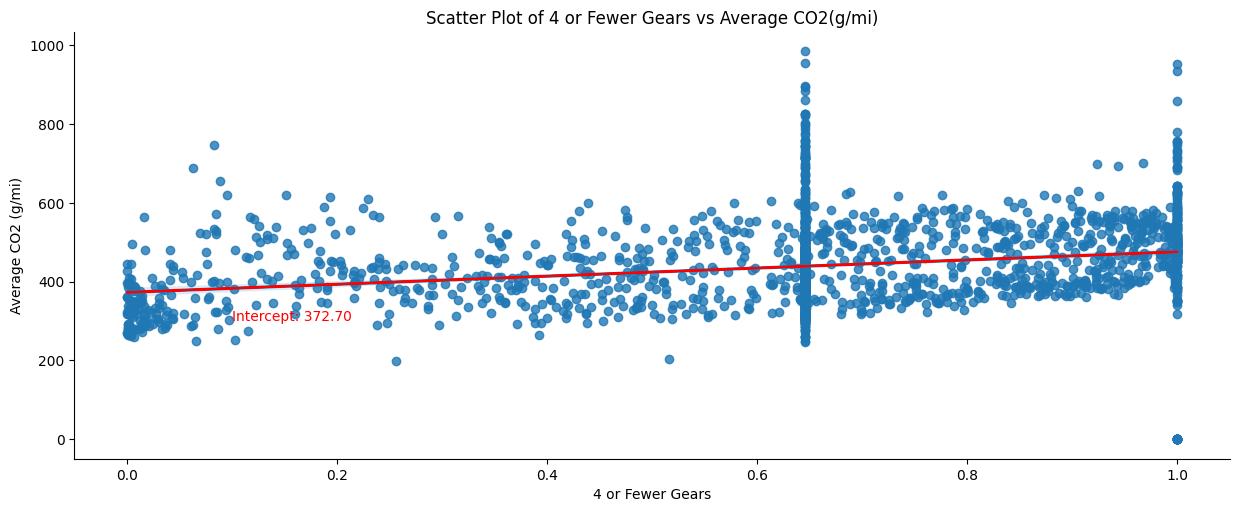

In [29]:
plt.figure(figsize=(15, 10))
sns.lmplot(data=bard_data, x='4_or_FewerGears', y='AvgCO2(g/mi)', height=5, aspect=2.5)
plt.title('Scatter Plot of 4 or Fewer Gears vs Average CO2(g/mi)')
plt.xlabel('4 or Fewer Gears')
plt.ylabel('Average CO2 (g/mi)')
slope, intercept = np.polyfit(bard_data['4_or_FewerGears'], bard_data['AvgCO2(g/mi)'], 1)
plt.plot(bard_data['4_or_FewerGears'], slope * bard_data['4_or_FewerGears'] + intercept, color='red')
plt.annotate(f'Intercept: {intercept:.2f}', xy=(0.1, 300), color='red')
plt.show()

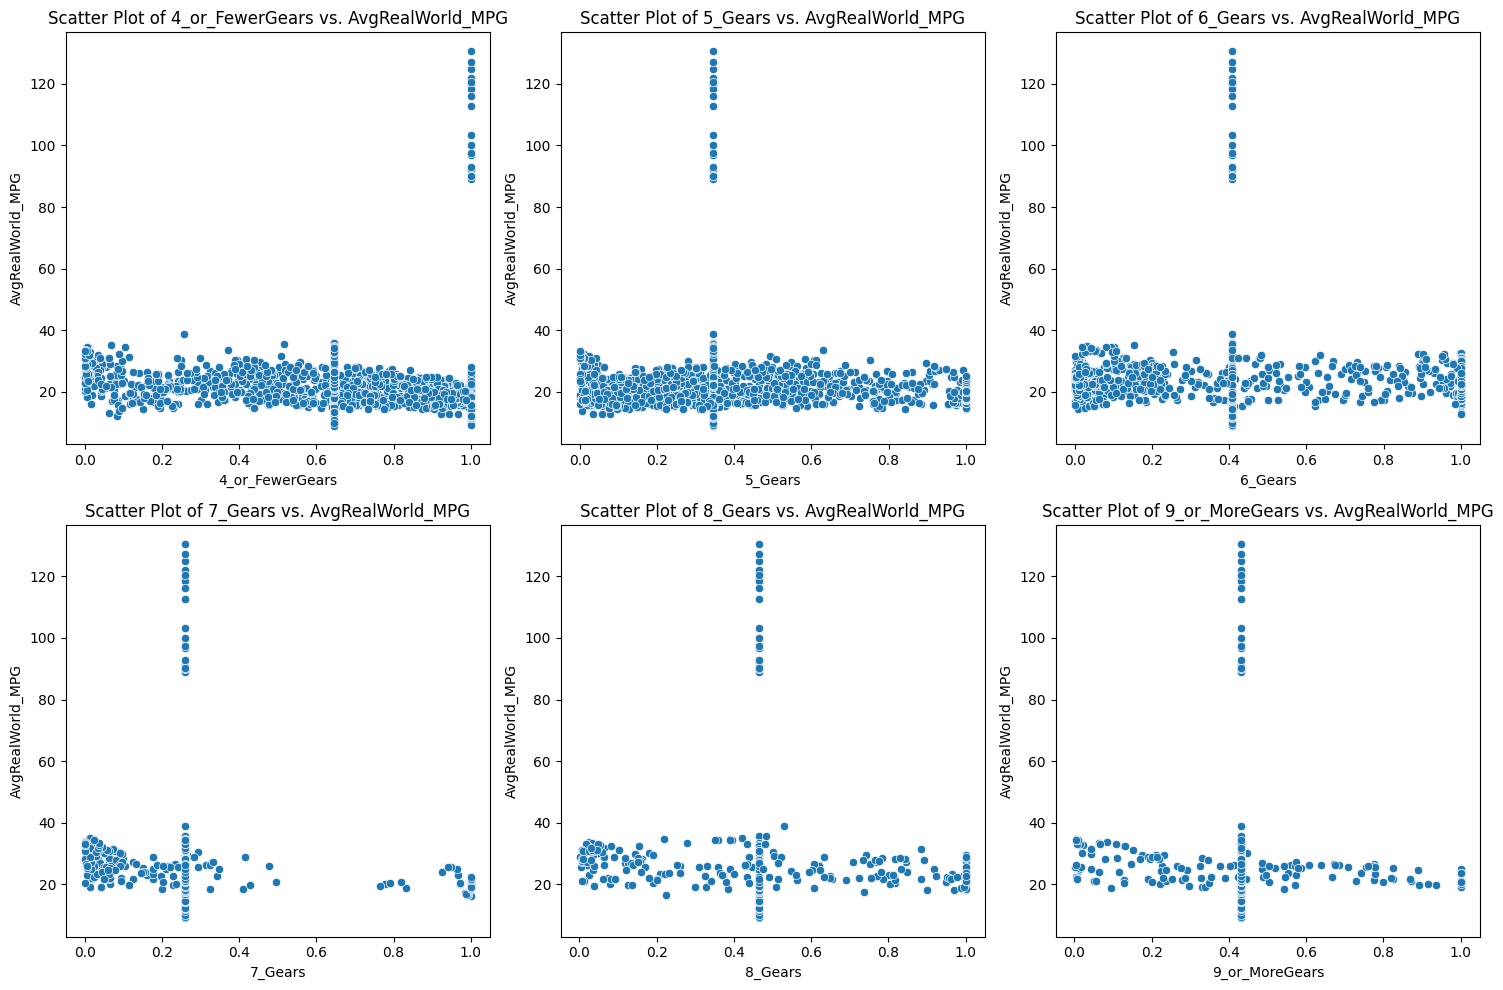

In [30]:
gears_columns = ['4_or_FewerGears','5_Gears', '6_Gears', '7_Gears', '8_Gears', '9_or_MoreGears']
target_column = 'AvgRealWorld_MPG'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, gear_column in enumerate(gears_columns):  
    sns.scatterplot(data=bard_data, x=gear_column, y=target_column, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Scatter Plot of {gear_column} vs. {target_column}')
    axes[i//3, i%3].set_xlabel(gear_column)
    axes[i//3, i%3].set_ylabel(target_column)

plt.tight_layout()
plt.show()

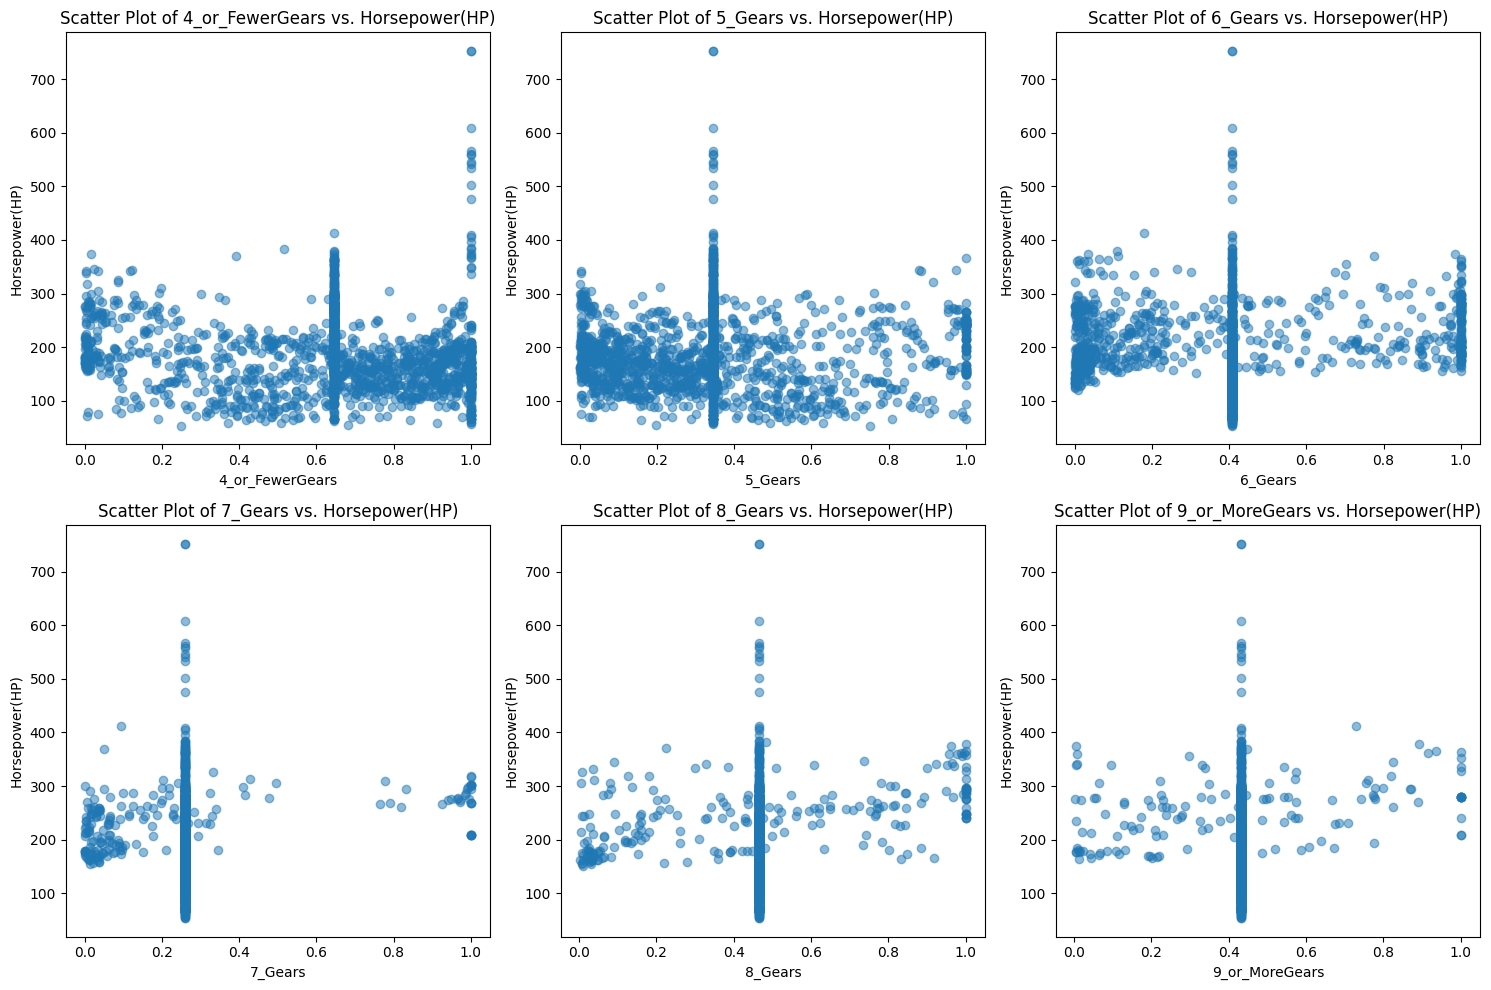

In [31]:
gears_columns = ['4_or_FewerGears','5_Gears', '6_Gears', '7_Gears', '8_Gears', '9_or_MoreGears']
target_column = 'Horsepower(HP)'

plt.figure(figsize=(15, 10))
for i, gear in enumerate(gears_columns, 1):
    plt.subplot(2, 3, i)
    plt.scatter(bard_data[gear], bard_data[target_column], alpha=0.5)
    plt.title(f'Scatter Plot of {gear} vs. {target_column}')
    plt.xlabel(gear)
    plt.ylabel(target_column)

plt.tight_layout()
plt.show()

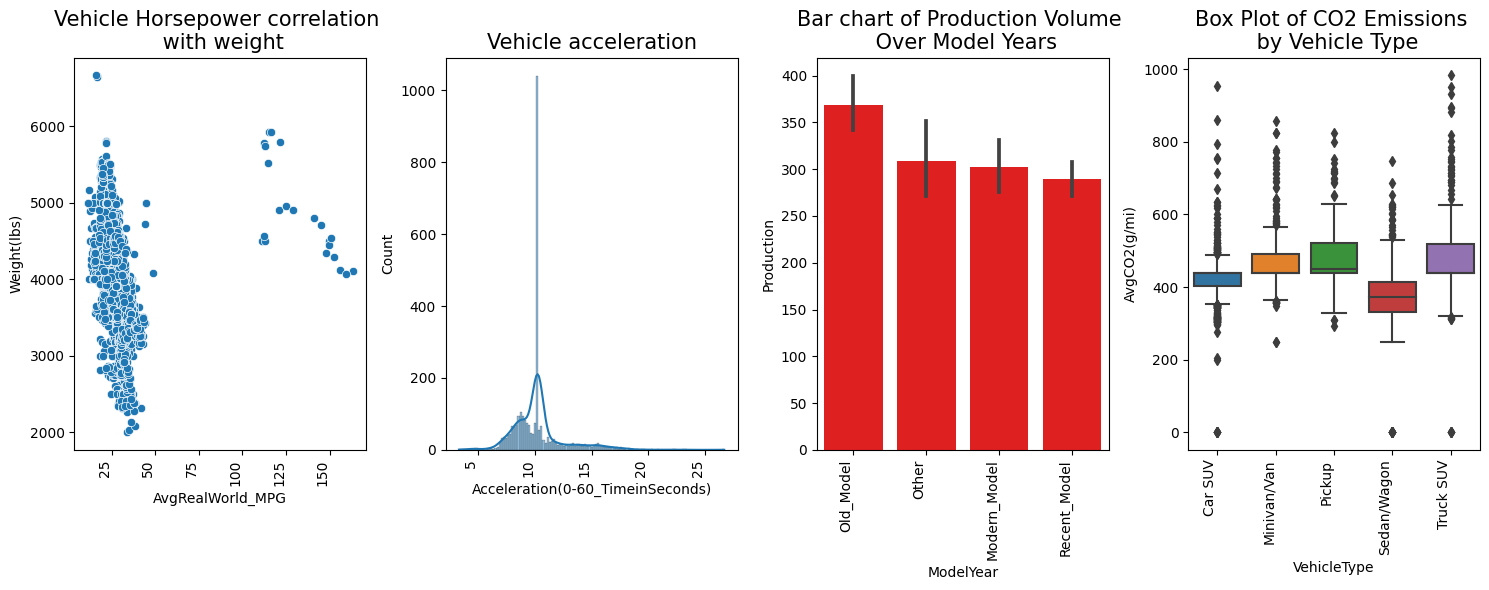

In [32]:
fig, ax = plt.subplots(1,4, figsize=(15,6))

sns.scatterplot(x="AvgRealWorld_MPG", y='Weight(lbs)', data=bard_data, ax=ax[0]).set_title('Vehicle Horsepower correlation \n with weight', fontsize=12)
sns.histplot(x="Acceleration(0-60_TimeinSeconds)", kde=True, data=bard_data, ax=ax[1]).set_title('Vehicle acceleration', fontsize=12)
sns.barplot(x='ModelYear', y='Production', data=bard_data, color='Red',ax=ax[2]).set_title('Bar chart of Production Volume \n Over Model Years', fontsize=12)
sns.boxplot(x="VehicleType", y="AvgCO2(g/mi)", data=bard_data, ax=ax[3]).set_title('Box Plot of CO2 Emissions \n by Vehicle Type', fontsize=12)

for axes in ax:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90, ha='right',)
    axes.set_yticklabels(axes.get_yticklabels(),)
    axes.set_title(axes.get_title(), fontsize=15)
            
plt.tight_layout()
plt.show()

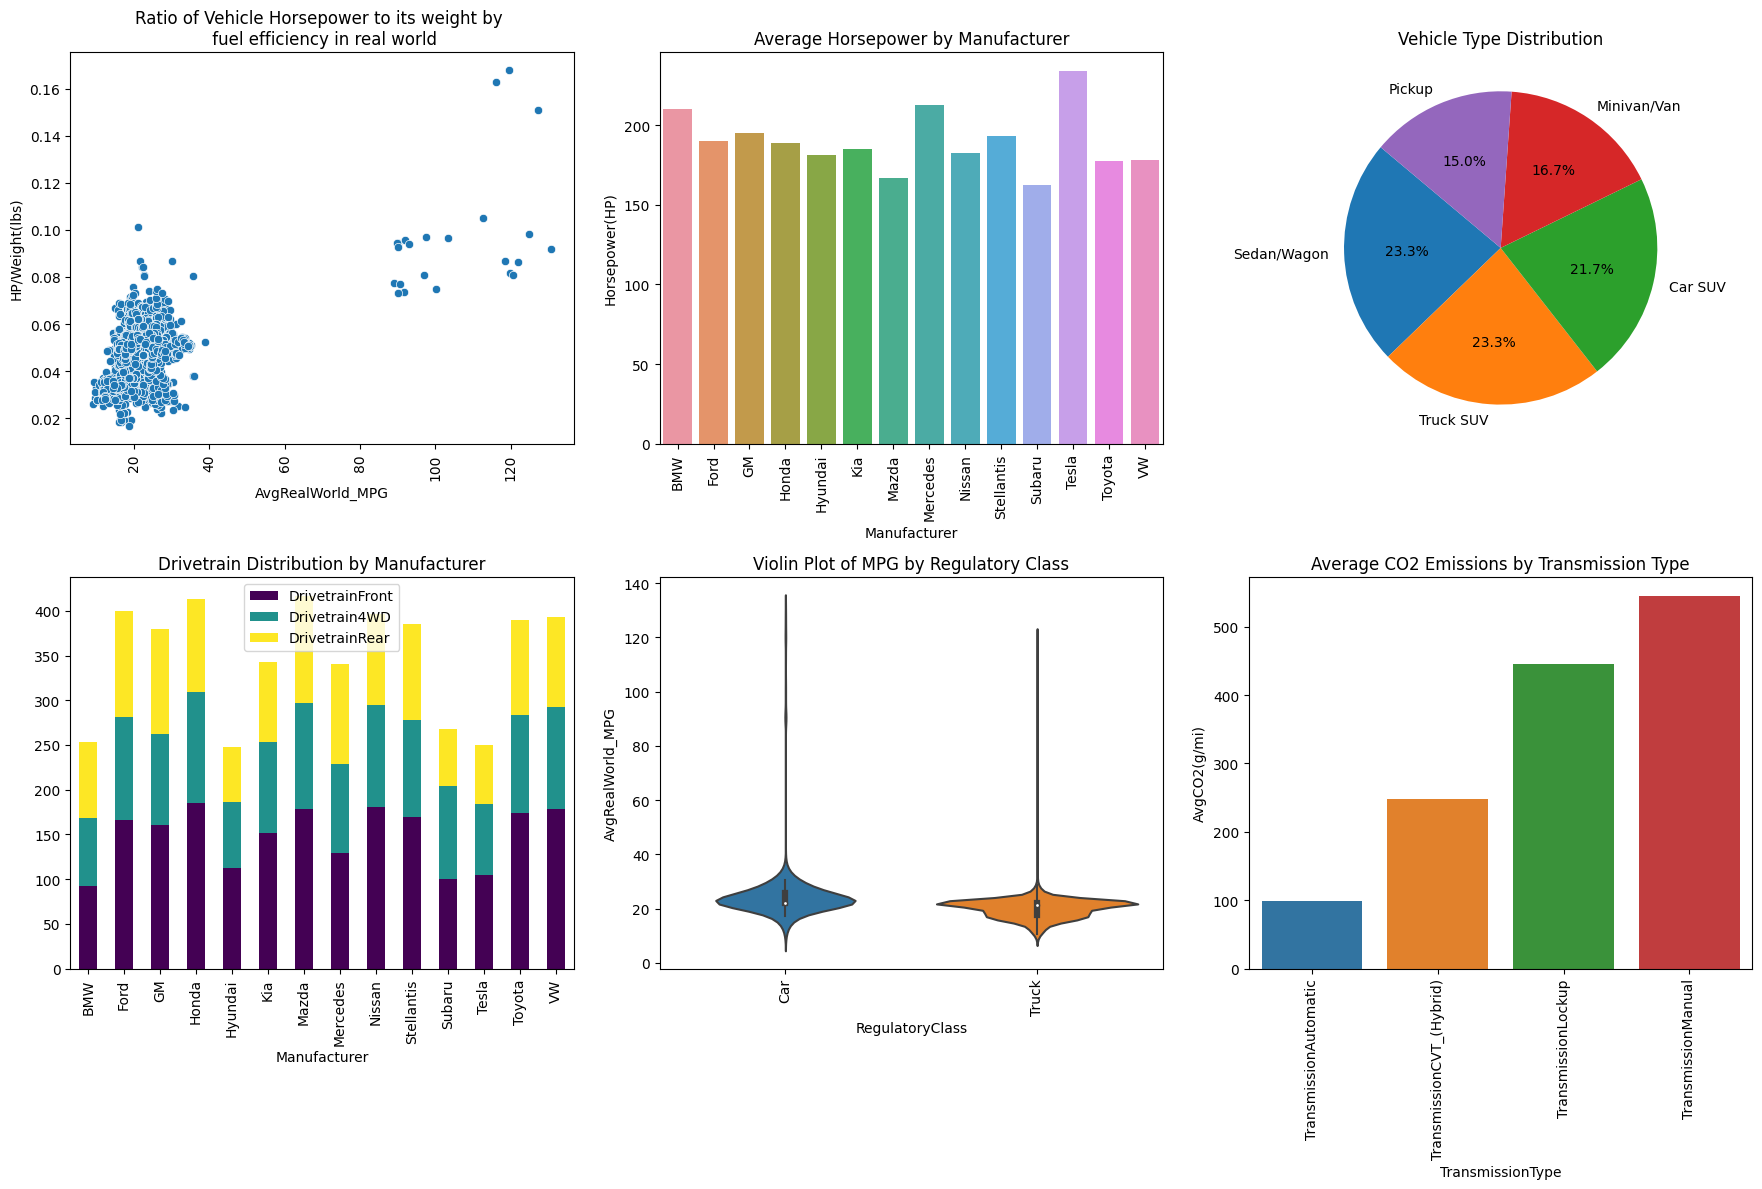

In [33]:

#subplots
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Scatter plot of HP/Weight vs. Real-World MPG
sns.scatterplot(x="AvgRealWorld_MPG", y='HP/Weight(lbs)', data=bard_data, ax=ax[0, 0]).set_title("Ratio of Vehicle Horsepower to its weight by \n fuel efficiency in real world")

# Bar plot of Average Horsepower by Manufacturer
average_hp_by_manufacturer = bard_data.groupby('Manufacturer')['Horsepower(HP)'].mean().reset_index()
sns.barplot(x='Manufacturer', y='Horsepower(HP)', data=average_hp_by_manufacturer, ax=ax[0, 1]).set_title('Average Horsepower by Manufacturer')

# Pie chart of Vehicle Type Distribution
vehicle_type_distribution = bard_data['VehicleType'].value_counts()
ax[0, 2].pie(vehicle_type_distribution, labels=vehicle_type_distribution.index, autopct='%1.1f%%', startangle=140)
ax[0, 2].set_title('Vehicle Type Distribution')

# Stacked bar chart of Drivetrain Distribution by Manufacturer
drivetrain_columns = ['DrivetrainFront', 'Drivetrain4WD', 'DrivetrainRear']
drivetrain_distribution = bard_data.groupby('Manufacturer')[drivetrain_columns].sum()
drivetrain_distribution.plot(kind='bar', stacked=True, ax=ax[1, 0], colormap='viridis')
ax[1, 0].set_title('Drivetrain Distribution by Manufacturer')

# Violin plot of MPG by Regulatory Class
sns.violinplot(x="RegulatoryClass", y="AvgRealWorld_MPG", data=bard_data, ax=ax[1, 1]).set_title('Violin Plot of MPG by Regulatory Class')

# Bar plot of Average CO2 Emissions by Transmission Type

# First, we merge the dataset to have a single column for transmission type
transmission_columns = ['TransmissionManual', 'TransmissionAutomatic', 'TransmissionLockup', 'TransmissionCVT_(Hybrid)', 'Transmission_Other']
bard_data_melted = bard_data.melt(id_vars=['AvgCO2(g/mi)'], value_vars=transmission_columns, var_name='TransmissionType', value_name='Presence')
# Filter out rows where the transmission type is not present (assuming 0 means not present)
bard_data_melted = bard_data_melted[bard_data_melted['Presence'] == 1]
# Group by transmission type and calculate the mean CO2 emissions
average_co2_by_transmission = bard_data_melted.groupby('TransmissionType')['AvgCO2(g/mi)'].mean().reset_index()
sns.barplot(x='TransmissionType', y='AvgCO2(g/mi)', data=average_co2_by_transmission, ax=ax[1, 2]).set_title('Average CO2 Emissions by Transmission Type')

# Rotate x-axis labels for all plots
for axes in ax.flat:
    if axes.get_xticklabels():
        for label in axes.get_xticklabels():
            label.set_rotation(90)
            
plt.tight_layout()
plt.show()

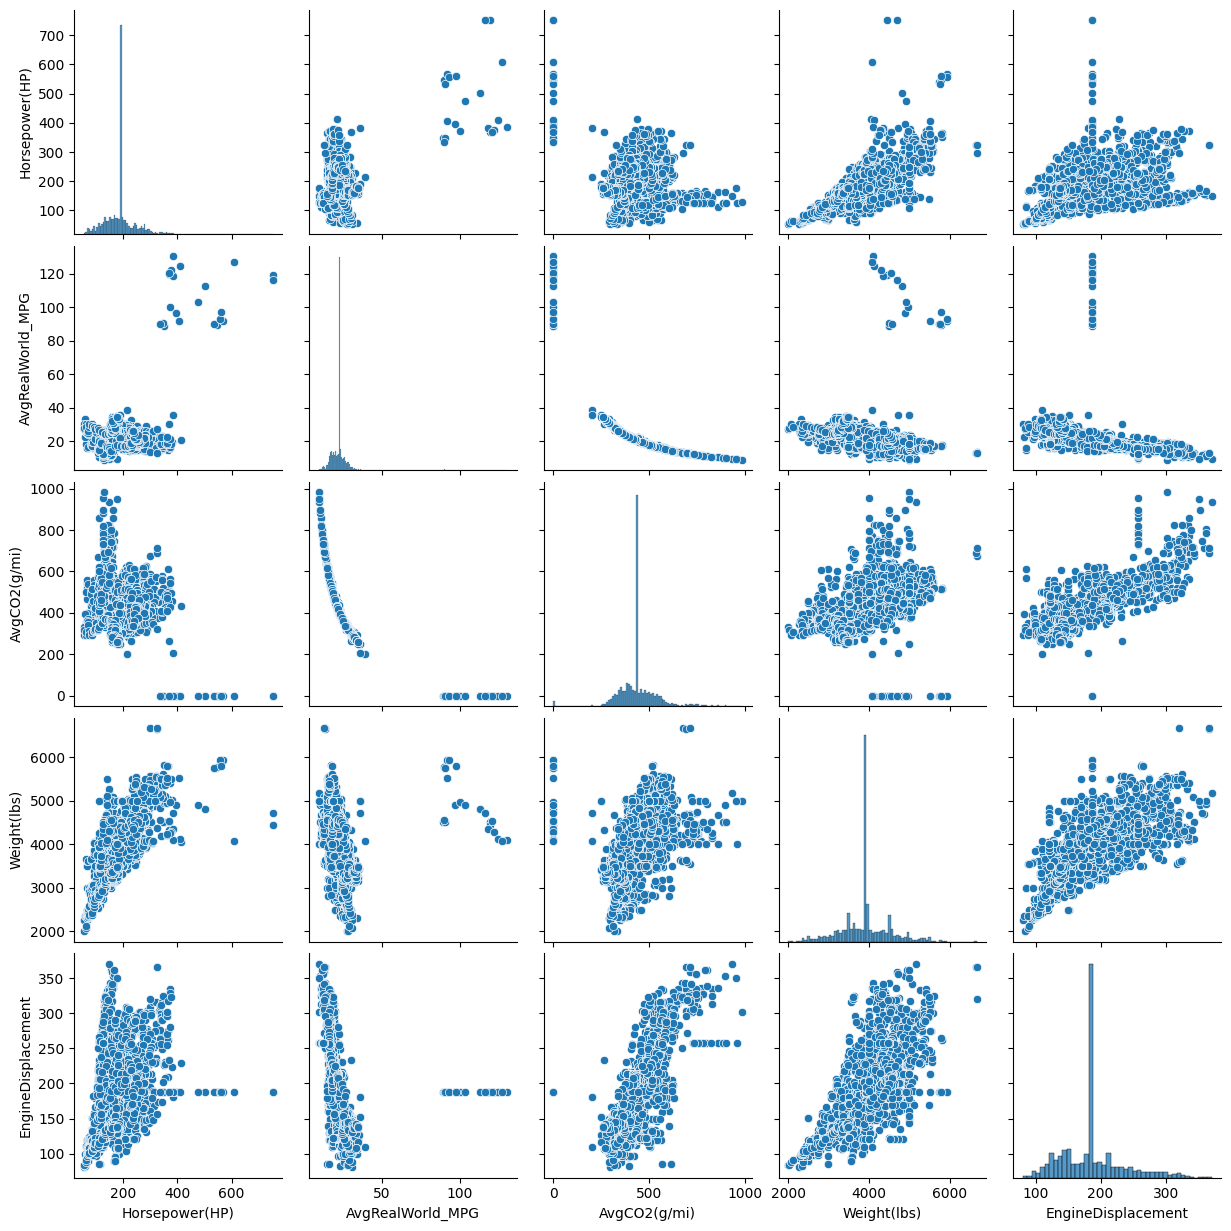

In [34]:
#Scatter Plot Matrix (Pair Plot)
sns.pairplot(bard_data[['Horsepower(HP)','AvgRealWorld_MPG','AvgCO2(g/mi)','Weight(lbs)','EngineDisplacement']], )
plt.show()

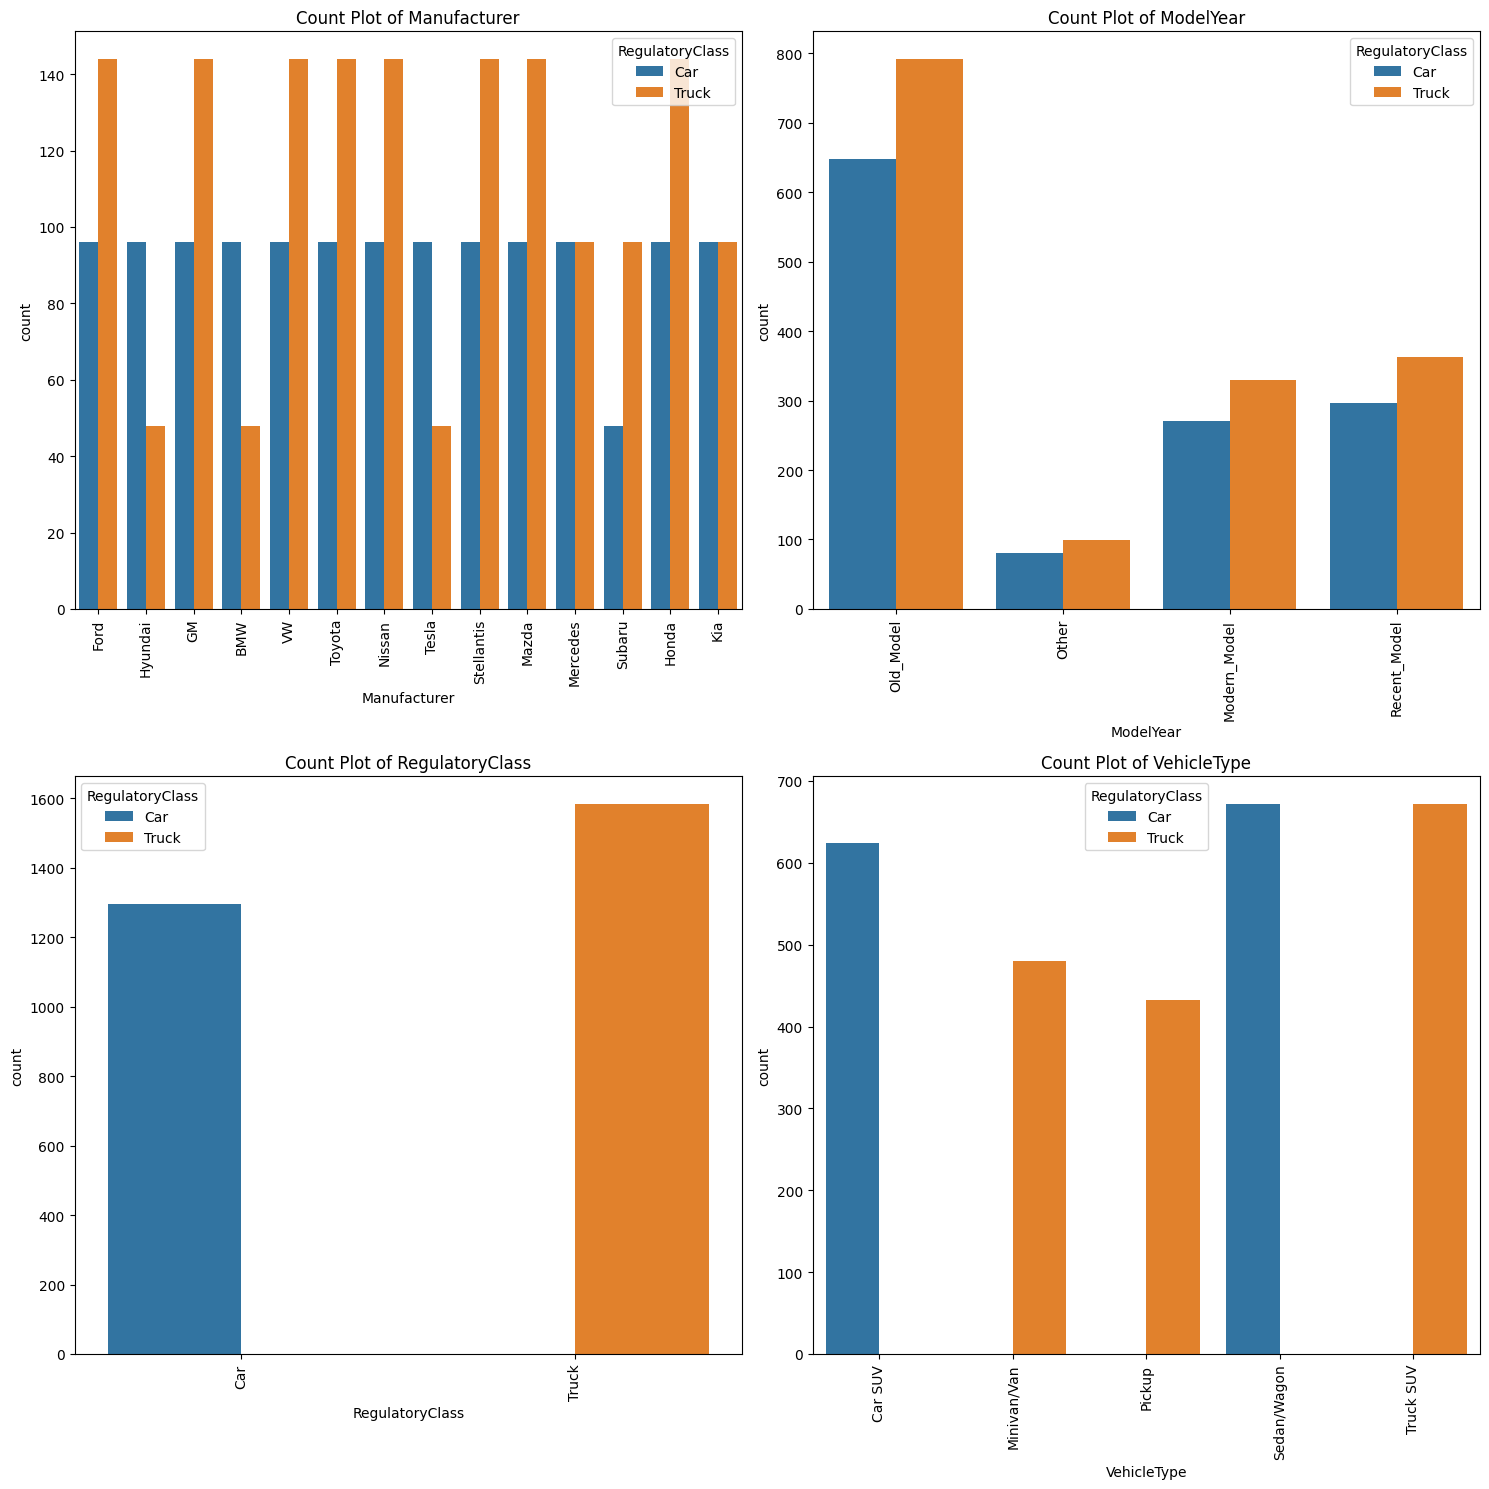

In [35]:
bard_var = ['Manufacturer','ModelYear','RegulatoryClass','VehicleType']

fig, axs = plt.subplots(nrows=2 , ncols=2, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate(bard_var[:4]):
    sns.countplot(x=var, hue='RegulatoryClass',data=bard_data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_title(f'Count Plot of {var}')

fig.tight_layout()

plt.show()

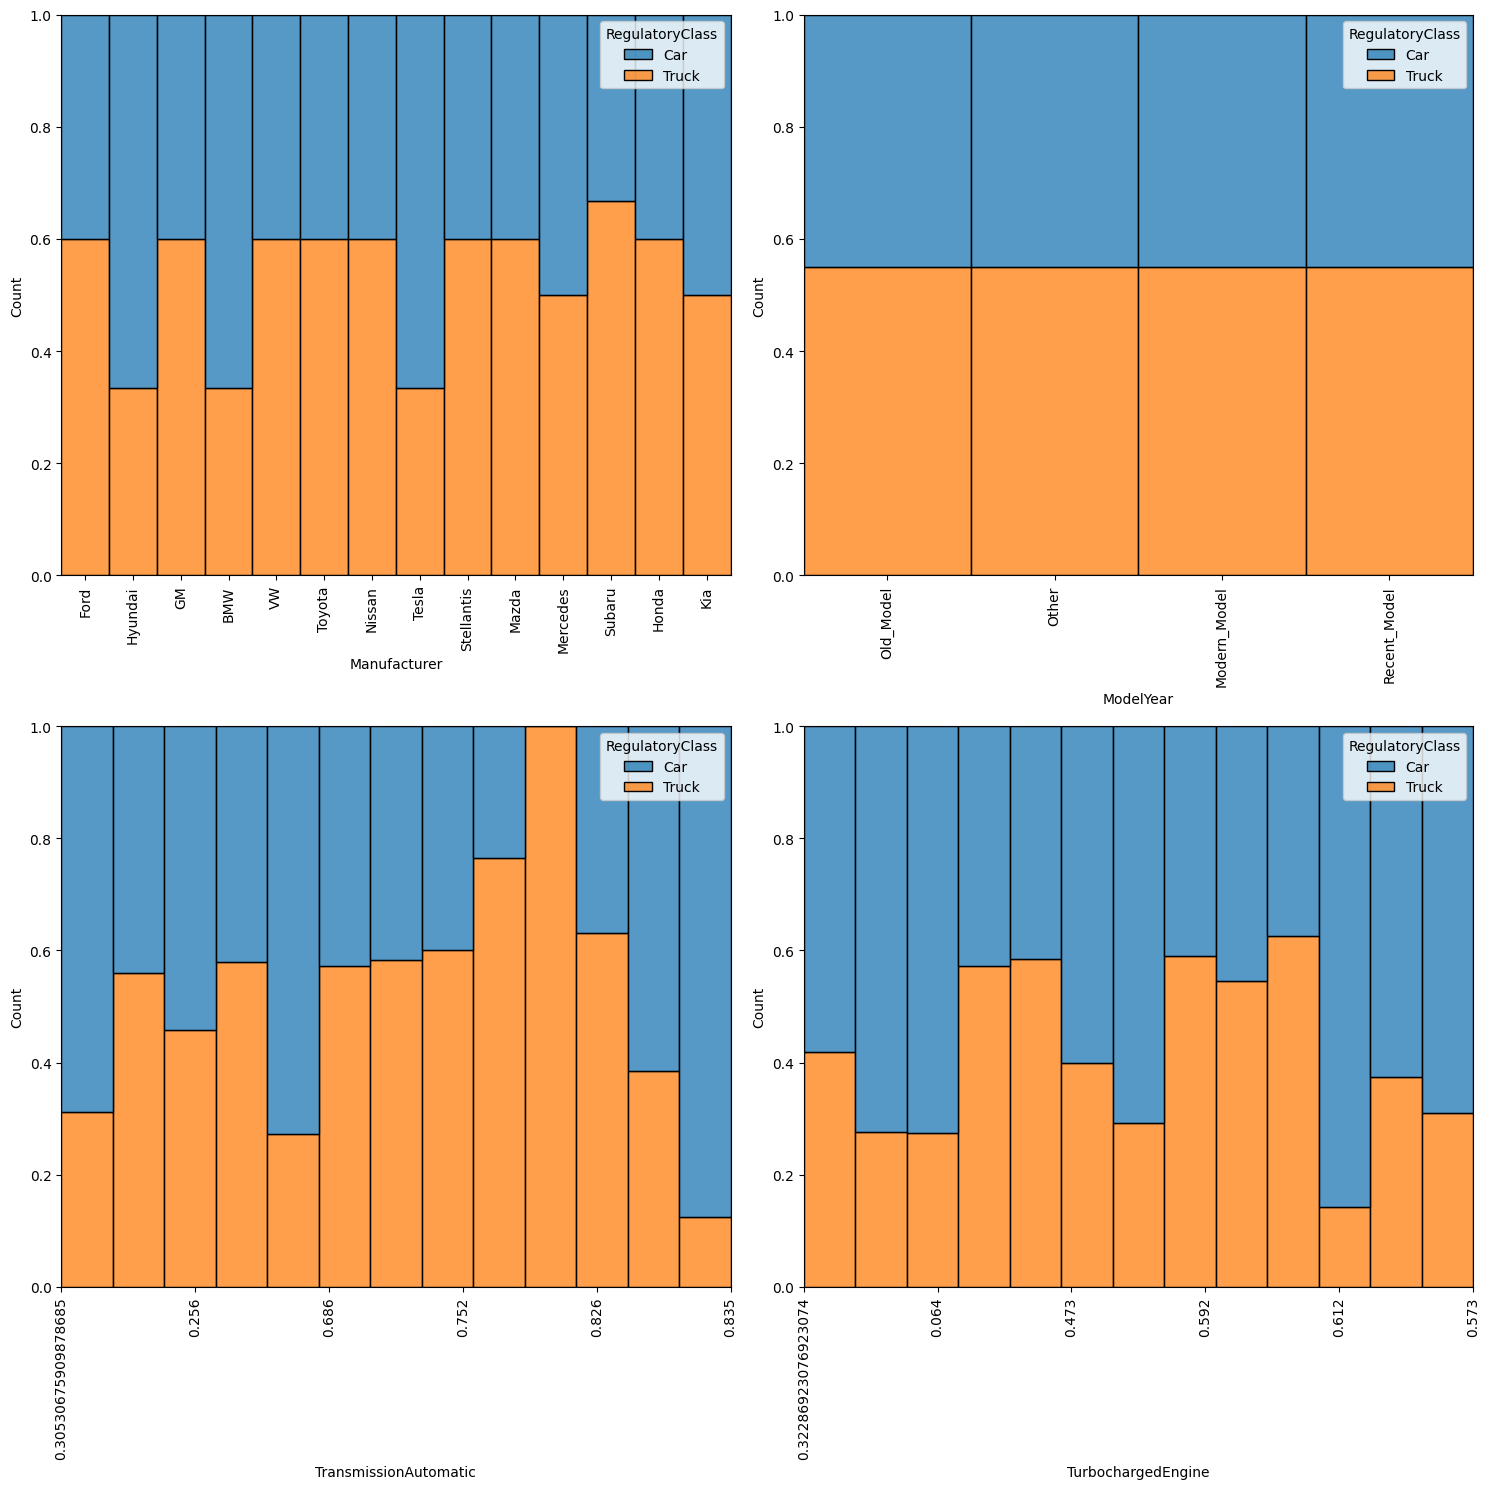

In [36]:
bard_var = ['Manufacturer','ModelYear','TransmissionAutomatic','TurbochargedEngine',]

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate(bard_var[:4]):
    sns.histplot(x=var, hue='RegulatoryClass', data=bard_data, ax=axs[i], multiple='fill', kde=False, element='bars')
    axs[i].set_xticklabels(bard_data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
    
fig.tight_layout()
plt.show()


- Descriptive data analysis

In [37]:
bard_data.describe()

Production  ProductionShare   2Cycle_MPG  RealWorld_MPG  \
count  2880.000000      2880.000000  2880.000000    2880.000000   
mean    333.096941         0.024358    27.572156      22.139607   
std     439.686868         0.033580    11.642123       8.471076   
min       0.000000         0.000000    10.587320       8.994720   
25%      97.750000         0.007000    23.573708      19.160810   
50%     333.096941         0.024358    27.572156      22.139607   
75%     333.096941         0.024358    28.108780      22.735400   
max    5377.000000         0.405000   176.245670     129.831470   

       RealWorld_MPG_City  RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  \
count         2880.000000        2880.000000          2880.000000   
mean            19.554939          25.063002           436.367455   
std              8.702787           8.390701            93.963133   
min              8.001960           9.588200             0.000000   
25%             16.624727          21.935673           390.987242   
50%             19.554939          25.063002           436.367455   
75%             19.649715          26.243772           464.254988   
max            137.749320         124.435660           988.023890   

       RealWorld_CO2_City(g/mi)  RealWorld_CO2_Hwy(g/mi)  Weight(lbs)  \
count               2880.000000              2880.000000  2880.000000   
mean                 496.926752               383.945484  3916.301228   
std                  101.603021                86.785265   588.151441   
min                    0.000000                 0.000000  2000.000000   
25%                  452.571905               338.523892  3629.440500   
50%                  496.926752               383.945484  3916.301228   
75%                  535.011898               406.249517  4109.124000   
max                 1110.602930               926.868380  6668.898000   

       FootPrint(sq.ft)  EngineDisplacement  Horsepower(HP)  \
count       2880.000000         2880.000000     2880.000000   
mean          50.270228          187.450322      188.530664   
std            3.095638           47.956228       59.298785   
min           42.561640           80.397200       54.119500   
25%           50.270228          153.461325      159.007150   
50%           50.270228          187.450322      188.530664   
75%           50.270228          201.962500      200.666100   
max           68.433210          370.720900      752.100900   

       Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  \
count                       2880.000000            2880.000000   
mean                          10.257176               1.038059   
std                            2.267828               0.281018   
min                            3.295600               0.399278   
25%                            8.943250               0.902333   
50%                           10.257176               1.038059   
75%                           10.257176               1.150165   
max                           26.694700               2.091151   

       HP/Weight(lbs)  Ton_MPG(RealWorld)  DrivetrainFront  Drivetrain4WD  \
count     2880.000000         2880.000000      2880.000000    2880.000000   
mean         0.047028           43.352957         0.723129       0.501504   
std          0.010272           20.479437         0.198127       0.237580   
min          0.016770           18.396130         0.000000       0.000000   
25%          0.042594           37.133525         0.723129       0.501504   
50%          0.047028           43.352957         0.723129       0.501504   
75%          0.051425           43.352957         0.723129       0.501504   
max          0.167895          281.994470         1.000000       1.000000   

       DrivetrainRear  TransmissionManual  TransmissionAutomatic  \
count     2880.000000         2880.000000            2880.000000   
mean         0.468060            0.246137               0.305307   
std          0.252758            0.189156               0.14491

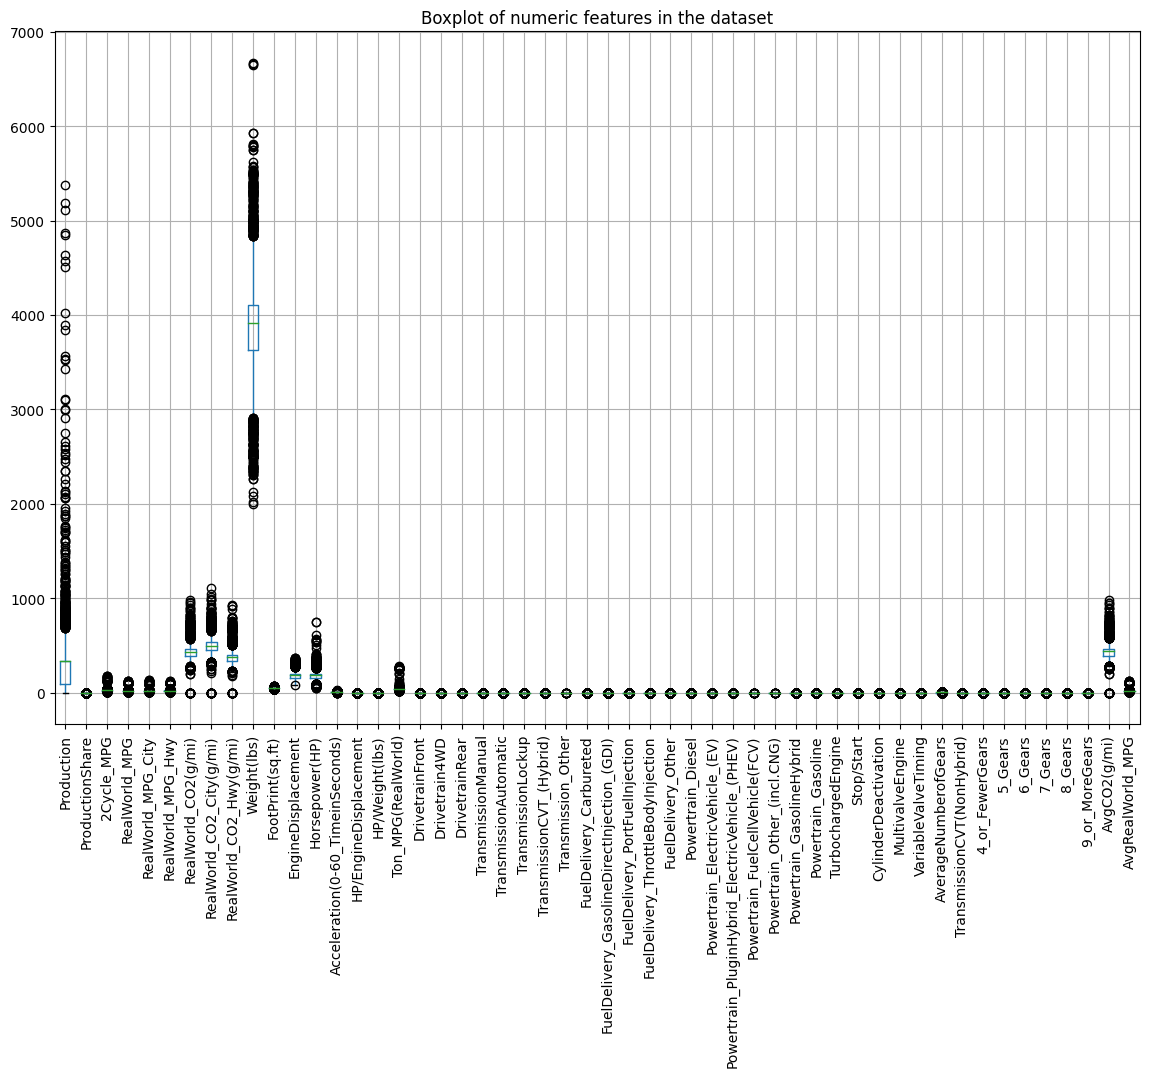

In [38]:
# Create the boxplot
bard_data.boxplot(figsize=(14,9))
plt.title('Boxplot of numeric features in the dataset')
plt.xticks(rotation=90)
plt.show()

In [39]:
bard_data.head()

Manufacturer  ModelYear RegulatoryClass VehicleType  Production  \
0         Ford  Old_Model             Car     Car SUV  333.096941   
1         Ford  Old_Model             Car     Car SUV  333.096941   
2         Ford  Old_Model             Car     Car SUV  333.096941   
3         Ford  Old_Model             Car     Car SUV  333.096941   
4         Ford  Old_Model             Car     Car SUV  333.096941   

   ProductionShare  2Cycle_MPG  RealWorld_MPG  RealWorld_MPG_City  \
0         0.024358   27.572156      22.139607           19.554939   
1         0.024358   27.572156      22.139607           19.554939   
2         0.024358   27.572156      22.139607           19.554939   
3         0.024358   27.572156      22.139607           19.554939   
4         0.024358   27.572156      22.139607           19.554939   

   RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  RealWorld_CO2_City(g/mi)  \
0          25.063002           436.367455                496.926752   
1          25.063002           436.367455                496.926752   
2          25.063002           436.367455                496.926752   
3          25.063002           436.367455                496.926752   
4          25.063002           436.367455                496.926752   

   RealWorld_CO2_Hwy(g/mi)  Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  \
0               383.945484  3916.301228         50.270228          187.450322   
1               383.945484  3916.301228         50.270228          187.450322   
2               383.945484  3916.301228         50.270228          187.450322   
3               383.945484  3916.301228         50.270228          187.450322   
4               383.945484  3916.301228         50.270228          187.450322   

   Horsepower(HP)  Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  \
0      188.530664                         10.257176               1.038059   
1      188.530664                         10.257176               1.038059   
2      188.530664                         10.257176               1.038059   
3      188.530664                         10.257176               1.038059   
4      188.530664                         10.257176               1.038059   

   HP/Weight(lbs)  Ton_MPG(RealWorld)  DrivetrainFront  Drivetrain4WD  \
0        0.047028           43.352957         0.723129       0.501504   
1        0.047028           43.352957         0.723129       0.501504   
2        0.047028           43.352957         0.723129       0.501504   
3        0.047028           43.352957         0.723129       0.501504   
4        0.047028           43.352957         0.723129       0.501504   

   DrivetrainRear  TransmissionManual  TransmissionAutomatic  \
0         0.46806            0.246137               0.305307   
1         0.46806            0.246137               0.305307   
2         0.46806            0.246137               0.305307   
3         0.46806            0.246137               0.305307   
4         0.46806            0.246137               0.305307   

   TransmissionLockup  TransmissionCVT_(Hybrid)  Transmission_Other  \
0            0.787847                  0.067078            0.052545   
1            0.787847                  0.067078            0.052545   
2            0.787847                  0.067078            0.052545   
3            0.787847                  0.067078            0.052545   
4            0.787847                  0.067078            0.052545   

   FuelDelivery_Carbureted  FuelDelivery_GasolineDirectInjection_(GDI)  \
0                 0.757492                                    0.652325   
1                 0.757492                                    0.652325   
2                 0.757492                                    0.652325   
3                 0.757492                                    0.652325   
4                 0.757492                                    0.652325   

   FuelDelivery_PortFuelInjection  FuelDelivery_ThrottleBodyInjection  \
0                   

**Create a Database for the cleaned Data**

In [40]:
#import modules
import sql
import sqlite3 as sqlite
import sqlalchemy_utils
import sqlalchemy
from sqlalchemy import create_engine
from sqlite3.dbapi2 import *

In [41]:
# Create an SQLAlchemy engine
db_path = r"C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/database/EmissionDatabase.db"

engine = create_engine(f'sqlite:///{db_path}')

In [42]:
# Connect to the SQLite database
con = sqlite.connect(db_path)
cur = con.cursor()

print(f'Connected successfully to {con}')

Connected successfully to <sqlite3.Connection object at 0x0000018EEDD87A60>


In [43]:
#Enable the SqL extension
%reload_ext sql

%sql sqlite:///EmissionDatabase.db
# %sql sqlite:///{db_path}

In [44]:
#incooperathe the dataset into the database

# %sql --persist bard_data #run this only once

In [45]:
# to delete the table from the database
# %sql drop table bard_data;

In [46]:
#Check for the database schema
%sql select name from sqlite_master where type='table';

 * sqlite:///EmissionDatabase.db
Done.


[('bard_data',)]

In [47]:
#check for the table info
%sql PRAGMA table_info(bard_data)

 * sqlite:///EmissionDatabase.db
Done.


[(0, 'index', 'BIGINT', 0, None, 0),
 (1, 'Manufacturer', 'TEXT', 0, None, 0),
 (2, 'ModelYear', 'TEXT', 0, None, 0),
 (3, 'RegulatoryClass', 'TEXT', 0, None, 0),
 (4, 'VehicleType', 'TEXT', 0, None, 0),
 (5, 'Production', 'FLOAT', 0, None, 0),
 (6, 'ProductionShare', 'FLOAT', 0, None, 0),
 (7, '2Cycle_MPG', 'FLOAT', 0, None, 0),
 (8, 'RealWorld_MPG', 'FLOAT', 0, None, 0),
 (9, 'RealWorld_MPG_City', 'FLOAT', 0, None, 0),
 (10, 'RealWorld_MPG_Hwy', 'FLOAT', 0, None, 0),
 (11, 'RealWorld_CO2(g/mi)', 'FLOAT', 0, None, 0),
 (12, 'RealWorld_CO2_City(g/mi)', 'FLOAT', 0, None, 0),
 (13, 'RealWorld_CO2_Hwy(g/mi)', 'FLOAT', 0, None, 0),
 (14, 'Weight(lbs)', 'FLOAT', 0, None, 0),
 (15, 'FootPrint(sq.ft)', 'FLOAT', 0, None, 0),
 (16, 'EngineDisplacement', 'FLOAT', 0, None, 0),
 (17, 'Horsepower(HP)', 'FLOAT', 0, None, 0),
 (18, 'Acceleration(0-60_TimeinSeconds)', 'FLOAT', 0, None, 0),
 (19, 'HP/EngineDisplacement', 'FLOAT', 0, None, 0),
 (20, 'HP/Weight(lbs)', 'FLOAT', 0, None, 0),
 (21, 'Ton_MPG(RealWorld)', 'FLOAT', 0, None, 0),
 (22, 'DrivetrainFront', 'FLOAT', 0, None, 0),
 (23, 'Drivetrain4WD', 'FLOAT', 0, None, 0),
 (24, 'DrivetrainRear', 'FLOAT', 0, None, 0),
 (25, 'TransmissionManual', 'FLOAT', 0, None, 0),
 (26, 'TransmissionAutomatic', 'FLOAT', 0, None, 0),
 (27, 'TransmissionLockup', 'FLOAT', 0, None, 0),
 (28, 'TransmissionCVT_(Hybrid)', 'FLOAT', 0, None, 0),
 (29, 'Transmission_Other', 'FLOAT', 0, None, 0),
 (30, 'FuelDelivery_Carbureted', 'FLOAT', 0, None, 0),
 (31, 'FuelDelivery_GasolineDirectInjection_(GDI)', 'FLOAT', 0, None, 0),
 (32, 'FuelDelivery_PortFuelInjection', 'FLOAT', 0, None, 0),
 (33, 'FuelDelivery_ThrottleBodyInjection', 'FLOAT', 0, None, 0),
 (34, 'FuelDelivery_Other', 'FLOAT', 0, None, 0),
 (35, 'Powertrain_Diesel', 'FLOAT', 0, None, 0),
 (36, 'Powertrain_ElectricVehicle_(EV)', 'FLOAT', 0, None, 0),
 (37, 'Powertrain_PluginHybrid_ElectricVehicle_(PHEV)', 'FLOAT', 0, None, 0),
 (38, 'Powertrain_FuelCellVehicle(FCV)', 'FLOAT', 0, None, 0),
 (39, 'Powertrain_Other_(incl.CNG)', 'FLOAT', 0, None, 0),
 (40, 'Powertrain_GasolineHybrid', 'FLOAT', 0, None, 0),
 (41, 'Powertrain_Gasoline', 'FLOAT', 0, None, 0),
 (42, 'TurbochargedEngine', 'FLOAT', 0, None, 0),
 (43, 'Stop/Start', 'FLOAT', 0, None, 0),
 (44, 'CylinderDeactivation', 'FLOAT', 0, None, 0),
 (45, 'MultivalveEngine', 'FLOAT', 0, None, 0),
 (46, 'VariableValveTiming', 'FLOAT', 0, None, 0),
 (47, 'AverageNumberofGears', 'FLOAT', 0, None, 0),
 (48, 'TransmissionCVT(NonHybrid)', 'FLOAT', 0, None, 0),
 (49, '4_or_FewerGears', 'FLOAT', 0, None, 0),
 (50, '5_Gears', 'FLOAT', 0, None, 0),
 (51, '6_Gears', 'FLOAT', 0, None, 0),
 (52, '7_Gears', 'FLOAT', 0, None, 0),
 (53, '8_Gears', 'FLOAT', 0, None, 0),
 (54, '9_or_MoreGears', 'FLOAT', 0, None, 0),
 (55, 'AvgCO2(g/mi)', 'FLOAT', 0, None, 0),
 (56, 'AvgRealWorld_MPG', 'FLOAT', 0, None, 0)]

In [48]:
#verifying the database loaded correctly
%sql SELECT * FROM bard_data LIMIT 5;


 * sqlite:///EmissionDatabase.db
Done.


[(0, 'Ford', 'Old_Model', 'Car', 'Car SUV', 333.0969414204251, 0.024357698289269054, 27.57215555779909, 22.13960689550732, 19.554939308430086, 25.06300190307925, 436.36745480565367, 496.92675172640077, 383.94548426047453, 3916.3012276627965, 50.27022827319588, 187.4503218079673, 188.53066436143365, 10.25717569847127, 1.0380590541368742, 0.04702803382130237, 43.3529565219586, 0.7231293673276676, 0.5015037720033528, 0.4680599393019727, 0.2461366237482117, 0.30530675909878685, 0.7878473282442747, 0.06707792207792208, 0.052545454545454555, 0.7574920212765958, 0.6523254817987151, 0.8193492575855391, 0.4412748538011696, 0.12485866666666667, 0.08112156862745099, 0.21060483870967742, 0.0221, 0.001, 0.0020909090909090908, 0.06699625468164794, 0.978441717791411, 0.32286923076923074, 0.4878803088803089, 0.34145739910313905, 0.8571510574018126, 0.8693840503672613, 4.881010638297872, 0.42230859375000007, 0.6459185867895545, 0.34378393574297184, 0.4060814419225634, 0.2583707865168539, 0.46427649769585255, 0.43098518518518514, 439.079896930843, 22.25251603567222),
 (1, 'Ford', 'Old_Model', 'Car', 'Car SUV', 333.0969414204251, 0.024357698289269054, 27.57215555779909, 22.13960689550732, 19.554939308430086, 25.06300190307925, 436.36745480565367, 496.92675172640077, 383.94548426047453, 3916.3012276627965, 50.27022827319588, 187.4503218079673, 188.53066436143365, 10.25717569847127, 1.0380590541368742, 0.04702803382130237, 43.3529565219586, 0.7231293673276676, 0.5015037720033528, 0.4680599393019727, 0.2461366237482117, 0.30530675909878685, 0.7878473282442747, 0.06707792207792208, 0.052545454545454555, 0.7574920212765958, 0.6523254817987151, 0.8193492575855391, 0.4412748538011696, 0.12485866666666667, 0.08112156862745099, 0.21060483870967742, 0.0221, 0.001, 0.0020909090909090908, 0.06699625468164794, 0.978441717791411, 0.32286923076923074, 0.4878803088803089, 0.34145739910313905, 0.8571510574018126, 0.8693840503672613, 4.881010638297872, 0.42230859375000007, 0.6459185867895545, 0.34378393574297184, 0.4060814419225634, 0.2583707865168539, 0.46427649769585255, 0.43098518518518514, 439.079896930843, 22.25251603567222),
 (2, 'Ford', 'Old_Model', 'Car', 'Car SUV', 333.0969414204251, 0.024357698289269054, 27.57215555779909, 22.13960689550732, 19.554939308430086, 25.06300190307925, 436.36745480565367, 496.92675172640077, 383.94548426047453, 3916.3012276627965, 50.27022827319588, 187.4503218079673, 188.53066436143365, 10.25717569847127, 1.0380590541368742, 0.04702803382130237, 43.3529565219586, 0.7231293673276676, 0.5015037720033528, 0.4680599393019727, 0.2461366237482117, 0.30530675909878685, 0.7878473282442747, 0.06707792207792208, 0.052545454545454555, 0.7574920212765958, 0.6523254817987151, 0.8193492575855391, 0.4412748538011696, 0.12485866666666667, 0.08112156862745099, 0.21060483870967742, 0.0221, 0.001, 0.0020909090909090908, 0.06699625468164794, 0.978441717791411, 0.32286923076923074, 0.4878803088803089, 0.34145739910313905, 0.8571510574018126, 0.8693840503672613, 4.881010638297872, 0.42230859375000007, 0.6459185867895545, 0.34378393574297184, 0.4060814419225634, 0.2583707865168539, 0.46427649769585255, 0.43098518518518514, 439.079896930843, 22.25251603567222),
 (3, 'Ford', 'Old_Model', 'Car', 'Car SUV', 333.0969414204251, 0.024357698289269054, 27.57215555779909, 22.13960689550732, 19.554939308430086, 25.06300190307925, 436.36745480565367, 496.92675172640077, 383.94548426047453, 3916.3012276627965, 50.27022827319588, 187.4503218079673, 188.53066436143365, 10.25717569847127, 1.0380590541368742, 0.04702803382130237, 43.3529565219586, 0.7231293673276676, 0.5015037720033528, 0.4680599393019727, 0.2461366237482117, 0.30530675909878685, 0.7878473282442747, 0.06707792207792208, 0.052545454545454555, 0.7574920212765958, 0.6523254817987151, 0.8193492575855391, 0.4412748538011696, 0.12485866666666667, 0.08112156862745099, 0.21060483870967742, 0.0221, 0.001, 0.0020909090909090908, 0.06699625468164794, 0.978441717791411, 0.32286923076923074, 0.4878803088803089

In [49]:
%sql SELECT Manufacturer, RegulatoryClass ,`Weight(lbs)`, `Horsepower(HP)`, ModelYear \
FROM bard_data \
WHERE ModelYear = 'Re' or ModelYear = 'Other' \
ORDER BY RegulatoryClass desc \
LIMIT 5;

 * sqlite:///EmissionDatabase.db
Done.


[('Ford', 'Truck', 4577.854, 198.0167, 'Other'),
 ('Ford', 'Truck', 3500.0, 140.0, 'Other'),
 ('Ford', 'Truck', 4029.375, 164.6046, 'Other'),
 ('Hyundai', 'Truck', 3916.3012276627965, 188.53066436143365, 'Other'),
 ('Hyundai', 'Truck', 3944.251, 211.336, 'Other')]

In [50]:
%sql select distinct VehicleType from bard_data;

 * sqlite:///EmissionDatabase.db
Done.


[('Car SUV',), ('Minivan/Van',), ('Pickup',), ('Sedan/Wagon',), ('Truck SUV',)]

In [51]:

print(f'Database closed {con.close()}')

Database closed None


**Machine Learning Section**

Label Encoding

In [52]:
for col in bard_data.select_dtypes(include=['object']).columns:
    
    print(f'{col}: {bard_data[col].unique()}')

Manufacturer: ['Ford' 'Hyundai' 'GM' 'BMW' 'VW' 'Toyota' 'Nissan' 'Tesla' 'Stellantis'
 'Mazda' 'Mercedes' 'Subaru' 'Honda' 'Kia']
ModelYear: ['Old_Model' 'Other' 'Modern_Model' 'Recent_Model']
RegulatoryClass: ['Car' 'Truck']
VehicleType: ['Car SUV' 'Minivan/Van' 'Pickup' 'Sedan/Wagon' 'Truck SUV']


In [53]:
from sklearn.preprocessing import LabelEncoder
"""
    Initialize the LabelEncoder object, fit the encoder to unique values,
    transform the unique values,
    print out encoded values and column name.
"""
for col in bard_data.select_dtypes(include=['object']).columns: 
    label_encoder = LabelEncoder()
    label_encoder.fit(bard_data[col].unique())
    bard_data[col] = label_encoder.transform(bard_data[col])
    print(f'{col}: {bard_data[col].unique()}')
print('label encoding completed')

Manufacturer: [ 1  4  2  0 13 12  8 11  9  6  7 10  3  5]
ModelYear: [1 2 0 3]
RegulatoryClass: [0 1]
VehicleType: [0 1 2 3 4]
label encoding completed


In [54]:
bard_data.head()

Manufacturer  ModelYear  RegulatoryClass  VehicleType  Production  \
0             1          1                0            0  333.096941   
1             1          1                0            0  333.096941   
2             1          1                0            0  333.096941   
3             1          1                0            0  333.096941   
4             1          1                0            0  333.096941   

   ProductionShare  2Cycle_MPG  RealWorld_MPG  RealWorld_MPG_City  \
0         0.024358   27.572156      22.139607           19.554939   
1         0.024358   27.572156      22.139607           19.554939   
2         0.024358   27.572156      22.139607           19.554939   
3         0.024358   27.572156      22.139607           19.554939   
4         0.024358   27.572156      22.139607           19.554939   

   RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  RealWorld_CO2_City(g/mi)  \
0          25.063002           436.367455                496.926752   
1          25.063002           436.367455                496.926752   
2          25.063002           436.367455                496.926752   
3          25.063002           436.367455                496.926752   
4          25.063002           436.367455                496.926752   

   RealWorld_CO2_Hwy(g/mi)  Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  \
0               383.945484  3916.301228         50.270228          187.450322   
1               383.945484  3916.301228         50.270228          187.450322   
2               383.945484  3916.301228         50.270228          187.450322   
3               383.945484  3916.301228         50.270228          187.450322   
4               383.945484  3916.301228         50.270228          187.450322   

   Horsepower(HP)  Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  \
0      188.530664                         10.257176               1.038059   
1      188.530664                         10.257176               1.038059   
2      188.530664                         10.257176               1.038059   
3      188.530664                         10.257176               1.038059   
4      188.530664                         10.257176               1.038059   

   HP/Weight(lbs)  Ton_MPG(RealWorld)  DrivetrainFront  Drivetrain4WD  \
0        0.047028           43.352957         0.723129       0.501504   
1        0.047028           43.352957         0.723129       0.501504   
2        0.047028           43.352957         0.723129       0.501504   
3        0.047028           43.352957         0.723129       0.501504   
4        0.047028           43.352957         0.723129       0.501504   

   DrivetrainRear  TransmissionManual  TransmissionAutomatic  \
0         0.46806            0.246137               0.305307   
1         0.46806            0.246137               0.305307   
2         0.46806            0.246137               0.305307   
3         0.46806            0.246137               0.305307   
4         0.46806            0.246137               0.305307   

   TransmissionLockup  TransmissionCVT_(Hybrid)  Transmission_Other  \
0            0.787847                  0.067078            0.052545   
1            0.787847                  0.067078            0.052545   
2            0.787847                  0.067078            0.052545   
3            0.787847                  0.067078            0.052545   
4            0.787847                  0.067078            0.052545   

   FuelDelivery_Carbureted  FuelDelivery_GasolineDirectInjection_(GDI)  \
0                 0.757492                                    0.652325   
1                 0.757492                                    0.652325   
2                 0.757492                                    0.652325   
3                 0.757492                                    0.652325   
4                 0.757492                                    0.652325   

   FuelDelivery_PortFuelInjection  FuelDelivery_ThrottleBodyInjection  \
0  

- Handling outliers

In [55]:
from scipy import stats
#Using the quartile range to isolate outliers

Q1 = bard_data.quantile(0.25)
Q3 = bard_data.quantile(0.75)
IQR = Q3-Q1
outliers = ((bard_data < (Q1 - 1.5 * IQR))) | (bard_data > (Q3 + 1.5 * IQR)).any(axis=1)

bard_data = bard_data[~outliers]

bard_data[:5]

Manufacturer  ModelYear  RegulatoryClass  VehicleType  Production  \
0             1          1                0            0  333.096941   
1             1          1                0            0  333.096941   
2             1          1                0            0  333.096941   
3             1          1                0            0  333.096941   
4             1          1                0            0  333.096941   

   ProductionShare  2Cycle_MPG  RealWorld_MPG  RealWorld_MPG_City  \
0         0.024358   27.572156      22.139607           19.554939   
1         0.024358   27.572156      22.139607           19.554939   
2         0.024358   27.572156      22.139607           19.554939   
3         0.024358   27.572156      22.139607           19.554939   
4         0.024358   27.572156      22.139607           19.554939   

   RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  RealWorld_CO2_City(g/mi)  \
0          25.063002           436.367455                496.926752   
1          25.063002           436.367455                496.926752   
2          25.063002           436.367455                496.926752   
3          25.063002           436.367455                496.926752   
4          25.063002           436.367455                496.926752   

   RealWorld_CO2_Hwy(g/mi)  Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  \
0               383.945484  3916.301228         50.270228          187.450322   
1               383.945484  3916.301228         50.270228          187.450322   
2               383.945484  3916.301228         50.270228          187.450322   
3               383.945484  3916.301228         50.270228          187.450322   
4               383.945484  3916.301228         50.270228          187.450322   

   Horsepower(HP)  Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  \
0      188.530664                         10.257176               1.038059   
1      188.530664                         10.257176               1.038059   
2      188.530664                         10.257176               1.038059   
3      188.530664                         10.257176               1.038059   
4      188.530664                         10.257176               1.038059   

   HP/Weight(lbs)  Ton_MPG(RealWorld)  DrivetrainFront  Drivetrain4WD  \
0        0.047028           43.352957         0.723129       0.501504   
1        0.047028           43.352957         0.723129       0.501504   
2        0.047028           43.352957         0.723129       0.501504   
3        0.047028           43.352957         0.723129       0.501504   
4        0.047028           43.352957         0.723129       0.501504   

   DrivetrainRear  TransmissionManual  TransmissionAutomatic  \
0         0.46806            0.246137               0.305307   
1         0.46806            0.246137               0.305307   
2         0.46806            0.246137               0.305307   
3         0.46806            0.246137               0.305307   
4         0.46806            0.246137               0.305307   

   TransmissionLockup  TransmissionCVT_(Hybrid)  Transmission_Other  \
0            0.787847                  0.067078            0.052545   
1            0.787847                  0.067078            0.052545   
2            0.787847                  0.067078            0.052545   
3            0.787847                  0.067078            0.052545   
4            0.787847                  0.067078            0.052545   

   FuelDelivery_Carbureted  FuelDelivery_GasolineDirectInjection_(GDI)  \
0                 0.757492                                    0.652325   
1                 0.757492                                    0.652325   
2                 0.757492                                    0.652325   
3                 0.757492                                    0.652325   
4                 0.757492                                    0.652325   

   FuelDelivery_PortFuelInjection  FuelDelivery_ThrottleBodyInjection  \
0  

- Data Preprocessing part 2

In [56]:
#check for missing values

check_missing = bard_data.isnull().sum() * 100 / bard_data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

DrivetrainRear                                    24.826389
5_Gears                                           22.881944
Drivetrain4WD                                     21.631944
FootPrint(sq.ft)                                  17.361111
4_or_FewerGears                                   16.631944
6_Gears                                           15.347222
TransmissionAutomatic                             13.368056
DrivetrainFront                                   12.777778
TurbochargedEngine                                11.354167
TransmissionLockup                                10.902778
FuelDelivery_PortFuelInjection                    10.868056
FuelDelivery_Other                                10.312500
MultivalveEngine                                   7.638889
Powertrain_Gasoline                                6.944444
FuelDelivery_GasolineDirectInjection_(GDI)         6.840278
Powertrain_GasolineHybrid                          6.631944
VariableValveTiming                     

In [57]:
#filling missing value with their mean
bard_data = bard_data.fillna(bard_data.mean())

check_missing = bard_data.isnull().sum() * 100 / bard_data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

Correlation plot

In [58]:

# Compute the correlation matrix
correlation = bard_data.corr()

# Display the correlation of each numeric column with 'Real-World_CO2_(g/mi)' as an example
CO2_Correlation = correlation['AvgCO2(g/mi)'].sort_values(ascending=False)
print(CO2_Correlation)

AvgCO2(g/mi)                                      1.000000
RealWorld_CO2(g/mi)                               0.998708
RealWorld_CO2_City(g/mi)                          0.976106
RealWorld_CO2_Hwy(g/mi)                           0.972974
EngineDisplacement                                0.784903
Weight(lbs)                                       0.455471
RegulatoryClass                                   0.384388
FuelDelivery_Carbureted                           0.382413
TransmissionAutomatic                             0.342024
DrivetrainRear                                    0.317802
4_or_FewerGears                                   0.242765
Acceleration(0-60_TimeinSeconds)                  0.170200
Powertrain_Gasoline                               0.161162
Drivetrain4WD                                     0.149799
FuelDelivery_ThrottleBodyInjection                0.093248
FootPrint(sq.ft)                                  0.063313
Transmission_Other                                0.0283

In [59]:
print(bard_data.isnull().sum())

Manufacturer                                      0
ModelYear                                         0
RegulatoryClass                                   0
VehicleType                                       0
Production                                        0
ProductionShare                                   0
2Cycle_MPG                                        0
RealWorld_MPG                                     0
RealWorld_MPG_City                                0
RealWorld_MPG_Hwy                                 0
RealWorld_CO2(g/mi)                               0
RealWorld_CO2_City(g/mi)                          0
RealWorld_CO2_Hwy(g/mi)                           0
Weight(lbs)                                       0
FootPrint(sq.ft)                                  0
EngineDisplacement                                0
Horsepower(HP)                                    0
Acceleration(0-60_TimeinSeconds)                  0
HP/EngineDisplacement                             0
HP/Weight(lb

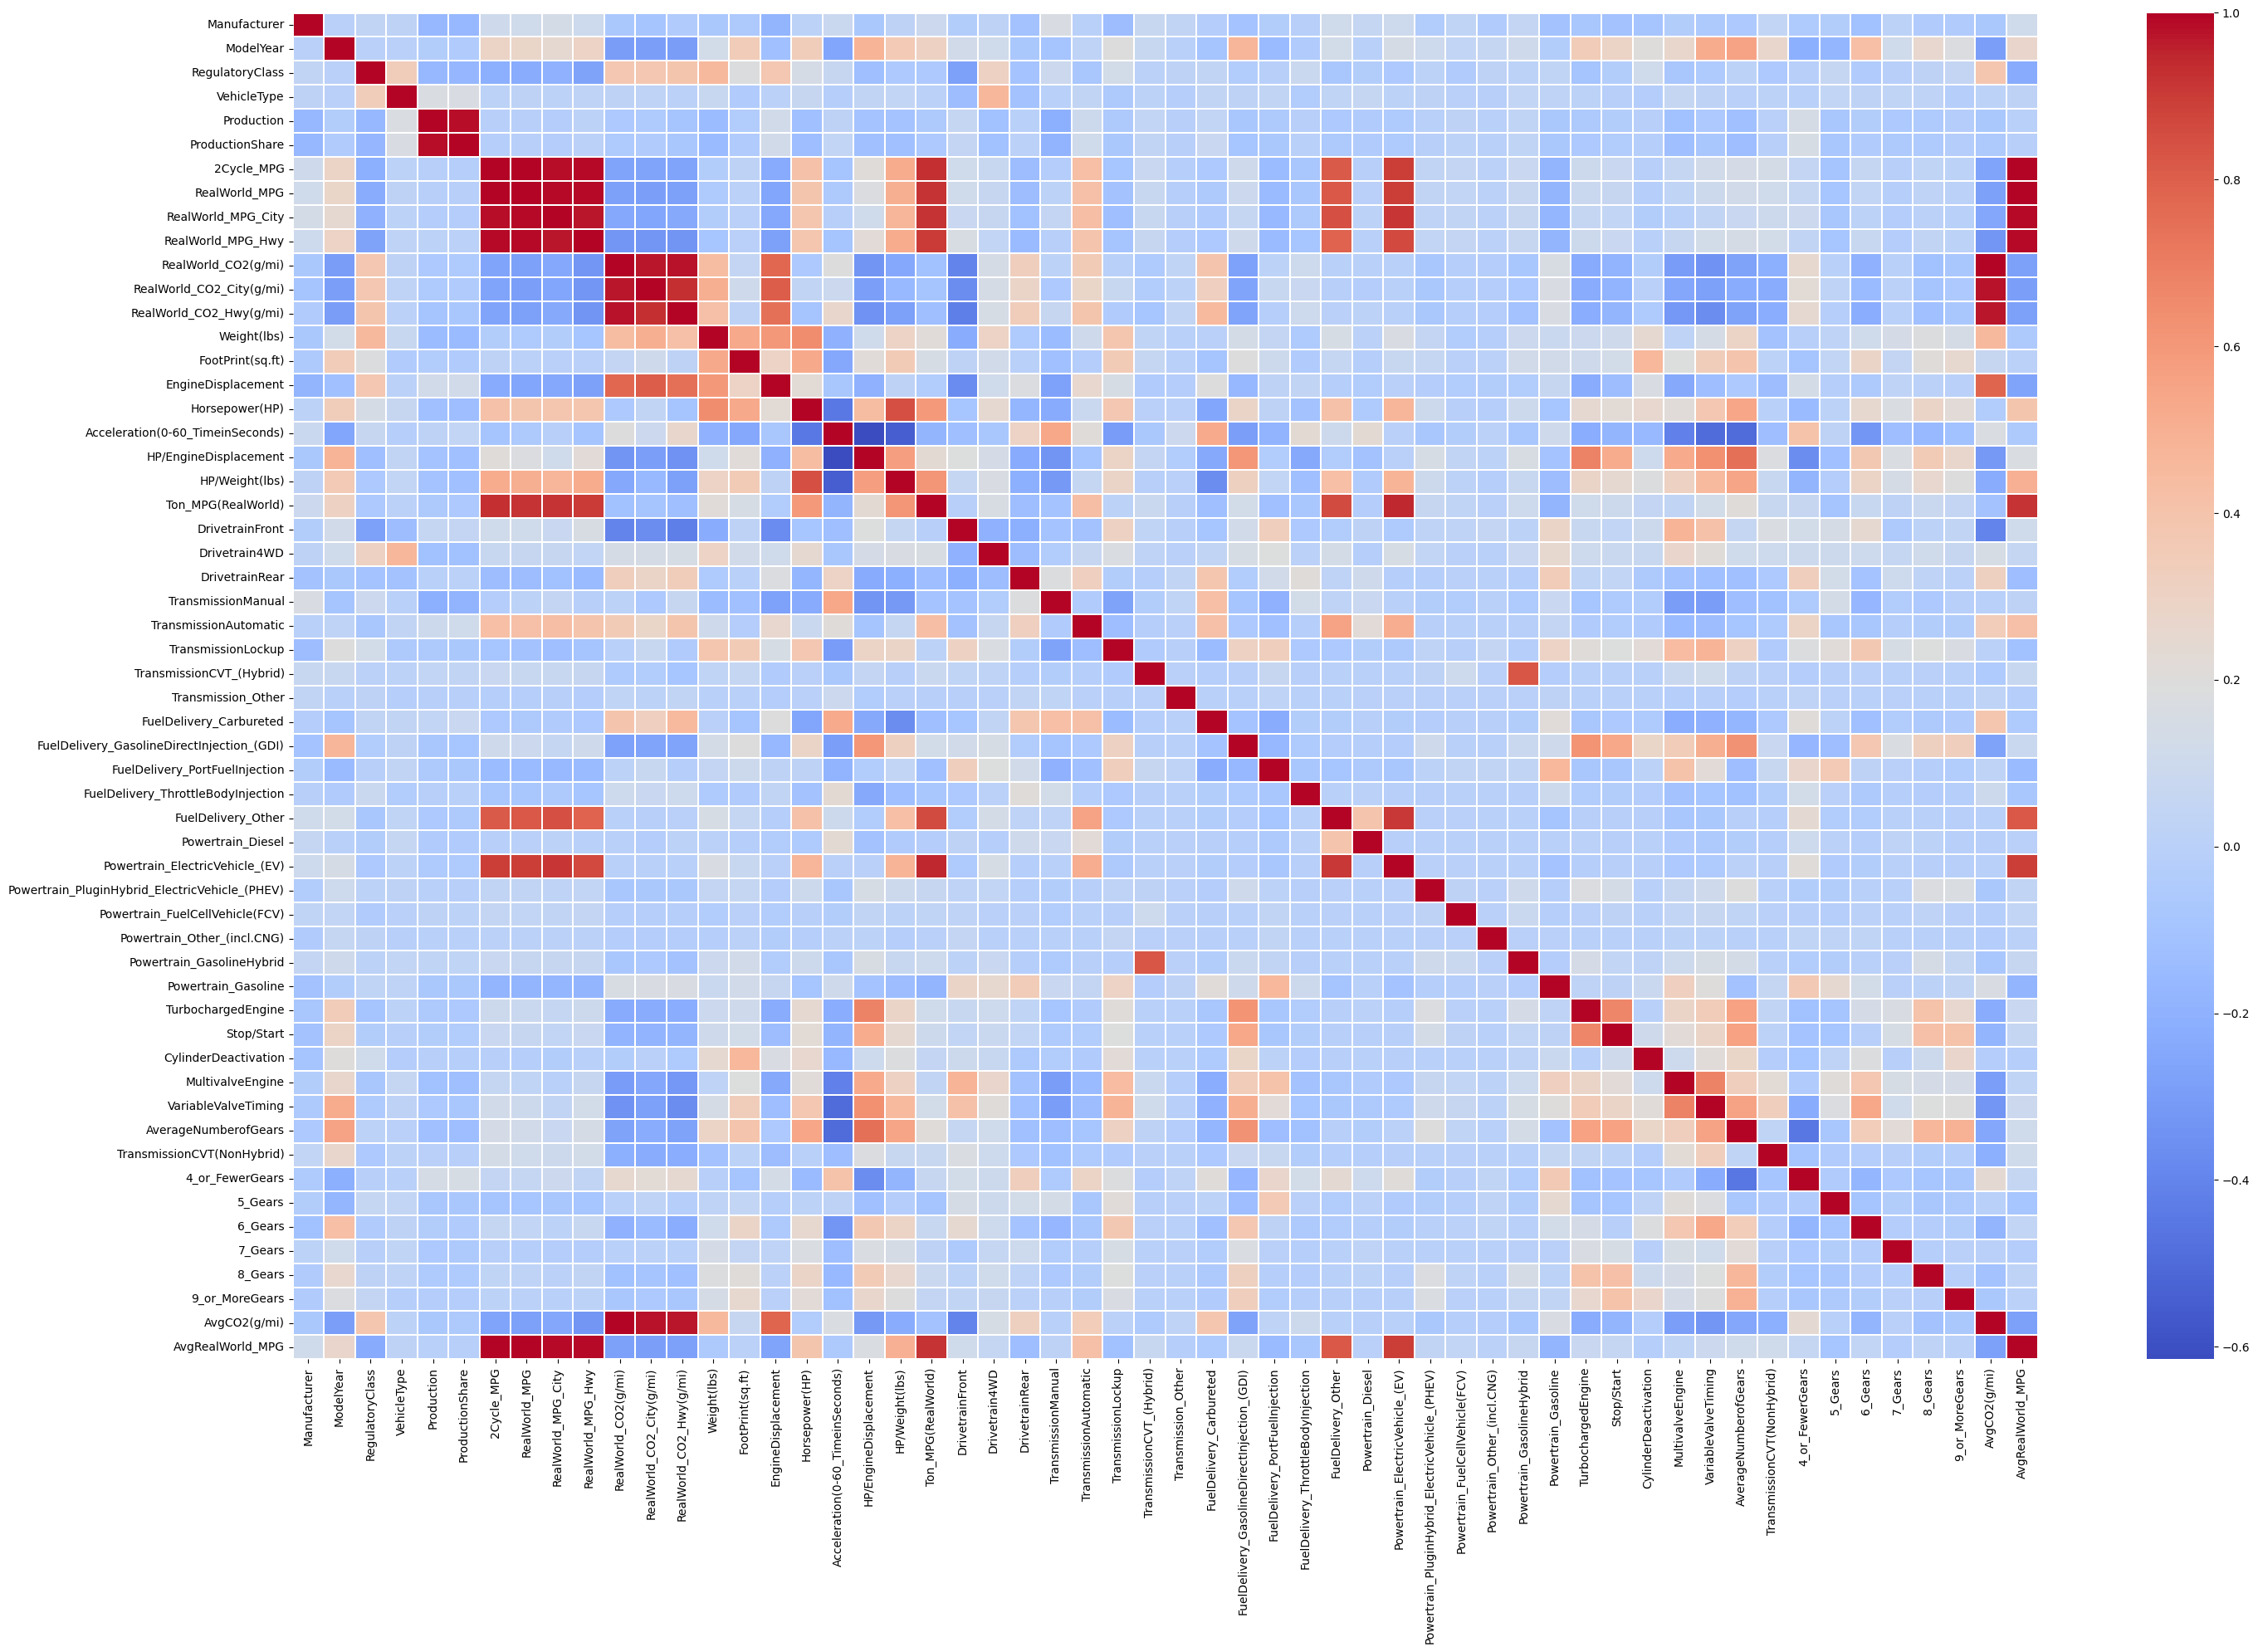

In [60]:
plt.figure(figsize=(30,20))

sns.heatmap(bard_data.corr(), linewidths=0.2, annot=False, fmt=".2f", cmap='coolwarm')
plt.tight_layout()
plt.show()

# TASK 1. Predicting CO2 Emission (Regression)
- objective: Predict the real-world CO2 emissions (g/mi) of a vehicle based on features like weight, engine displacement, horsepower, MPG etc.



|            Column Name               |        Relevance        |
|--------------------------------------|-------------------------|
| Manufacturer                         | Indirectly relevant     |
| Model_Year                           | Relevant                |
| Regulatory_Class                     | Relevant                |
| Vehicle_Type                         | Highly relevant         |
| Production_(000)                     | Not directly relevant   |
| Production_Share                     | Not directly relevant   |
| 2_Cycle_MPG                          | Highly relevant         |
| Real_World_MPG                       | Highly relevant         |
| Real_World_MPG_City                  | Relevant                |
| Real_World_MPG_Hwy                   | Relevant                |
| Real_World_CO2_(g/mi)                | Target variable         |
| Real_World_CO2_City_(g/mi)           | Relevant                |
| Real_World_CO2_Hwy_(g/mi)            | Relevant                |
| Weight_(lbs)                         | Highly relevant         |
| Footprint_(sq._ft.)                  | Relevant                |
| Engine_Displacement                  | Relevant                |
| Horsepower_(HP)                      | Relevant                |
| Acceleration_(0_60_time_in_seconds)  | Relevant                |
| HP/Engine_Displacement               | Relevant                |
| HP/Weight_(lbs)                      | Relevant                |
| Ton_MPG_(Real_World)                 | Relevant                |
| Drivetrain_Front                     | Relevant                |
| Drivetrain_4WD                       | Relevant                |
| Drivetrain_Rear                      | Relevant                |
| Transmission_Manual                  | Relevant                |
| Transmission_Automatic               | Relevant                |
| Transmission_Lockup                  | Relevant                |
| Transmission_CVT_(Hybrid)            | Relevant                |
| Transmission_Other                   | Relevant                |
| Fuel_Delivery_Carbureted             | Relevant                |
| Fuel_Delivery_Gasoline_Direct_Injection_(GDI) | Relevant    |
| Fuel_Delivery_Port_Fuel_Injection    | Relevant                |
| Fuel_Delivery_Throttle_Body_Injection| Relevant                |
| Fuel_Delivery_Other                  | Relevant                |
| Powertrain_Diesel                    | Relevant                |
| Powertrain_Electric_Vehicle_(EV)     | Highly relevant         |
| Powertrain_Plug_in_Hybrid_Electric_Vehicle_(PHEV) | Relevant  |
| Powertrain_Fuel_Cell_Vehicle_(FCV)   | Highly relevant         |
| Powertrain_Other_(incl._CNG)         | Relevant                |
| Powertrain_Gasoline_Hybrid           | Relevant                |
| Powertrain_Gasoline                  | Relevant                |
| Turbocharged_Engine                  | Relevant                |
| Stop/Start                           | Relevant                |
| Cylinder_Deactivation                | Relevant                |
| Multivalve_Engine                    | Relevant                |
| Variable_Valve_Timing                | Relevant                |
| Average_Number_of_Gears              | Relevant                |
| Transmission_CVT_(Non_Hybrid)        | Relevant                |
| 4_or_Fewer_Gears                     | Relevant                |
| 5_Gears                              | Relevant                |
| 6_Gears                              | Relevant                |
| 7_Gears                              | Relevant                |
| 8_Gears                              | Relevant                |
| 9_or_More_Gears                      | Relevant                |
| Mean_CO2_(g/mi)                      | Similar to target       |
| Mean_Real_World_MPG                  | Highly relevant         |



**Model Selection**

In [68]:
#import libraries for machine learning.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, accuracy_score, roc_curve
import shap
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import pycaret
import joblib


In [68]:
bard_data.columns

Index(['Manufacturer', 'ModelYear', 'RegulatoryClass', 'VehicleType',
       'Production', 'ProductionShare', '2Cycle_MPG', 'RealWorld_MPG',
       'RealWorld_MPG_City', 'RealWorld_MPG_Hwy', 'RealWorld_CO2(g/mi)',
       'RealWorld_CO2_City(g/mi)', 'RealWorld_CO2_Hwy(g/mi)', 'Weight(lbs)',
       'FootPrint(sq.ft)', 'EngineDisplacement', 'Horsepower(HP)',
       'Acceleration(0-60_TimeinSeconds)', 'HP/EngineDisplacement',
       'HP/Weight(lbs)', 'Ton_MPG(RealWorld)', 'DrivetrainFront',
       'Drivetrain4WD', 'DrivetrainRear', 'TransmissionManual',
       'TransmissionAutomatic', 'TransmissionLockup',
       'TransmissionCVT_(Hybrid)', 'Transmission_Other',
       'FuelDelivery_Carbureted', 'FuelDelivery_GasolineDirectInjection_(GDI)',
       'FuelDelivery_PortFuelInjection', 'FuelDelivery_ThrottleBodyInjection',
       'FuelDelivery_Other', 'Powertrain_Diesel',
       'Powertrain_ElectricVehicle_(EV)',
       'Powertrain_PluginHybrid_ElectricVehicle_(PHEV)',
       'Powertrain_FuelCe

In [70]:
#feature selection
features = [
    '2Cycle_MPG', 'RealWorld_MPG',
    'RealWorld_MPG_City', 'RealWorld_MPG_Hwy', 'Weight(lbs)', 'FootPrint(sq.ft)',
    'EngineDisplacement', 'Horsepower(HP)', 'Acceleration(0-60_TimeinSeconds)',
    'HP/EngineDisplacement', 'HP/Weight(lbs)', 'Ton_MPG(RealWorld)','AvgRealWorld_MPG',
    'DrivetrainFront', 'Drivetrain4WD', 'DrivetrainRear', 'TransmissionManual',
    'TransmissionAutomatic', 'TransmissionLockup', 'TransmissionCVT_(Hybrid)',
    'Transmission_Other', 'FuelDelivery_Carbureted', 'FuelDelivery_GasolineDirectInjection_(GDI)',
    'FuelDelivery_PortFuelInjection', 'FuelDelivery_ThrottleBodyInjection', 'FuelDelivery_Other',
    'Powertrain_Diesel', 'Powertrain_ElectricVehicle_(EV)', 'Powertrain_PluginHybrid_ElectricVehicle_(PHEV)',
    'Powertrain_FuelCellVehicle(FCV)', 'Powertrain_Other_(incl.CNG)', 'Powertrain_GasolineHybrid',
    'Powertrain_Gasoline', 'TurbochargedEngine', 'Stop/Start', 'CylinderDeactivation', 'MultivalveEngine',
    'VariableValveTiming', 'AverageNumberofGears', 'TransmissionCVT(NonHybrid)', '4_or_FewerGears',
    '5_Gears', '6_Gears', '7_Gears', '8_Gears', '9_or_MoreGears'
]

target = ['AvgCO2(g/mi)']

X = bard_data[features]
y = bard_data[target]

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)

numerical_features = X.select_dtypes(include=['int64', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('label_encoder', LabelEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

#asve the preprocessor
joblib.dump(preprocessor, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/preprocessor.pkl')

print('Testing set:', X_test.shape, y_test.shape)
print('Training set:', X_train.shape, y_train.shape)

Testing set: (951, 46) (951, 1)
Training set: (1929, 46) (1929, 1)


In [71]:
# X_test_csv = pd.DataFrame(preprocessor.fit_transform(X_test), columns=bard_data.columns)

# #svae the test dataset
# X_test_csv.to_csv('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/test_data.csv')
# X_test_csv[:5]

In [72]:
# #Data normalization
# scaler = StandardScaler()
# data_scaled = pd.DataFrame(scaler.fit_transform(bard_data), columns=bard_data.columns)
# data_scaled[:5]

In [73]:
# #Train Test Split
# X = data_scaled.drop(columns=['Real_World_CO2_(g/mi)','Real_World_CO2_City_(g/mi)','Real_World_CO2_Hwy_(g/mi)'],axis=1)
# y = data_scaled['Mean_CO2_(g/mi)']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print('Testing set:', X_test.shape, y_test.shape)
# print('Training set:', X_train.shape, y_train.shape)

- hyperparameter tuning

In [74]:
#setting up the models

xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()

# Hyperparameter tuning with Bayesian Optimization
xgb_search = BayesSearchCV(
    xgb_model,
    {
        'n_estimators': (50, 300),
        'max_depth': (3, 10),
        'learning_rate': (0.001, 0.1),
        'subsample': (0.6, 1.0)
    },
    n_iter=50,
    cv=10,
    scoring='neg_mean_squared_error',
    random_state=42
)

rf_search = BayesSearchCV(
    rf_model,
    {
        'n_estimators': (50, 300),
        'criterion': ("squared_error", "absolute_error", "friedman_mse", "poisson"),
        'max_depth': (1, 10),
        'max_features': (0.1, 1.0)
    },
    n_iter=50,
    cv=7,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Training the models
xgb_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)

# Best models
best_xgb = xgb_search.best_params_
print('Best estimator xgb:', xgb_search.best_params_)


best_rf = rf_search.best_params_
print('Best estimator rf: ', rf_search.best_params_)

Best estimator xgb: OrderedDict([('learning_rate', 0.05873582229080029), ('max_depth', 3), ('n_estimators', 300), ('subsample', 0.6)])
Best estimator rf:  OrderedDict([('criterion', 'absolute_error'), ('max_depth', 9), ('max_features', 0.26361313439309486), ('n_estimators', 285)])


- XGB prediction

In [75]:
#XGB prediction
xgb_model = XGBRegressor(**best_xgb).fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_preds[0:5]

array([378.3143 , 360.34567, 472.05594, 508.76285, 306.2052 ],
      dtype=float32)

- Random Forest Prediction

In [76]:
#RandomForest Prediction
rf_model = RandomForestRegressor(**best_rf).fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_preds[0:5]

array([386.89370273, 357.74329849, 473.28599014, 517.7718238 ,
       328.76237186])

**Saving the models with their Hyperparameters**

In [77]:
#save the models.
joblib.dump(xgb_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/xgb_model.pkl')

joblib.dump(rf_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/rf_model.pkl')

print('Models saved successfully')

Models saved successfully


- Features Importance with SHAP

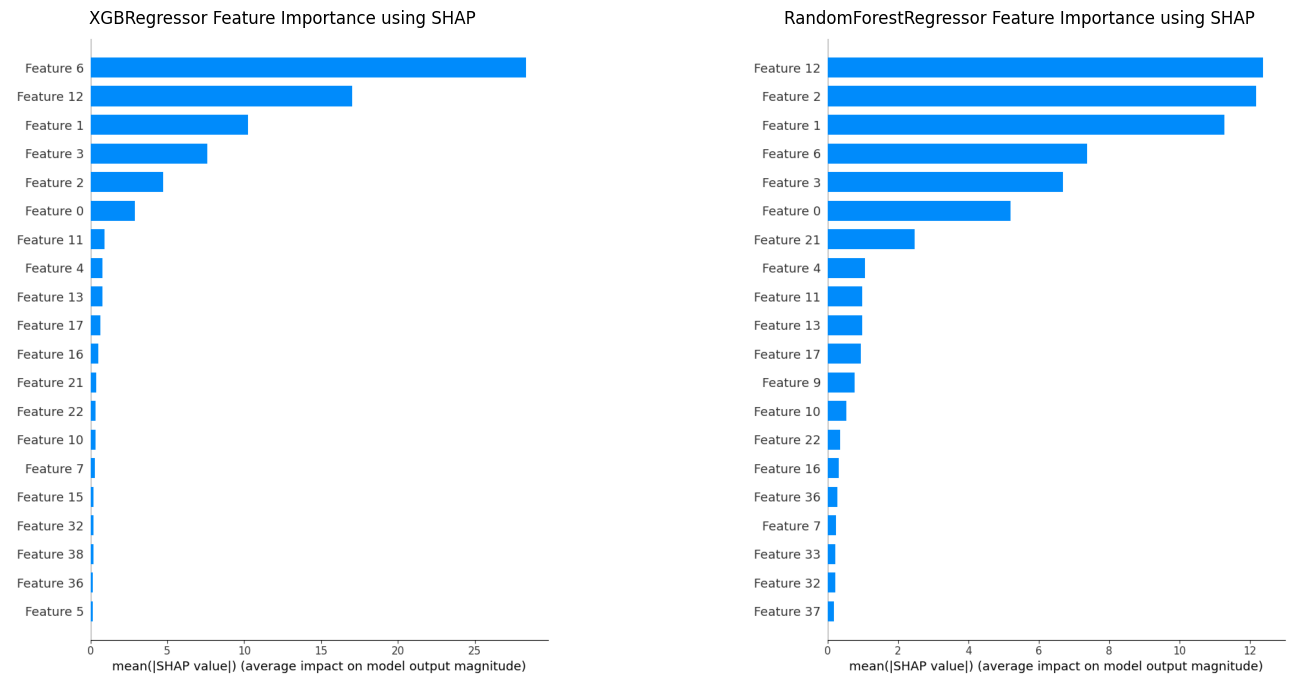

In [78]:
#XGBRegressor SHAP 
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)

#RandomForestRegressor SHAP
explainer_rf = shap.Explainer(rf_model)
shap_values_rf = explainer_rf(X_test)

#create figures with subplots for SHAP
plt.figure(figsize=(8, 7))
shap.summary_plot(shap_values_xgb, X_test, show=False, plot_type='bar')
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/shap_xgb.png', bbox_inches='tight')
plt.close()

plt.figure(figsize=(8, 7))
shap.summary_plot(shap_values_rf, X_test, show=False, plot_type='bar')
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/shap_rf.png', bbox_inches='tight')
plt.close()

# Combine the plots into one figure
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Save the plots
xgb_img = plt.imread('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/shap_xgb.png')
rf_img = plt.imread('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/shap_rf.png')

ax[0].imshow(xgb_img)
ax[0].axis('off')  
ax[0].set_title('XGBRegressor Feature Importance using SHAP')

ax[1].imshow(rf_img)
ax[1].axis('off')  
ax[1].set_title('RandomForestRegressor Feature Importance using SHAP')

plt.tight_layout()
plt.show()

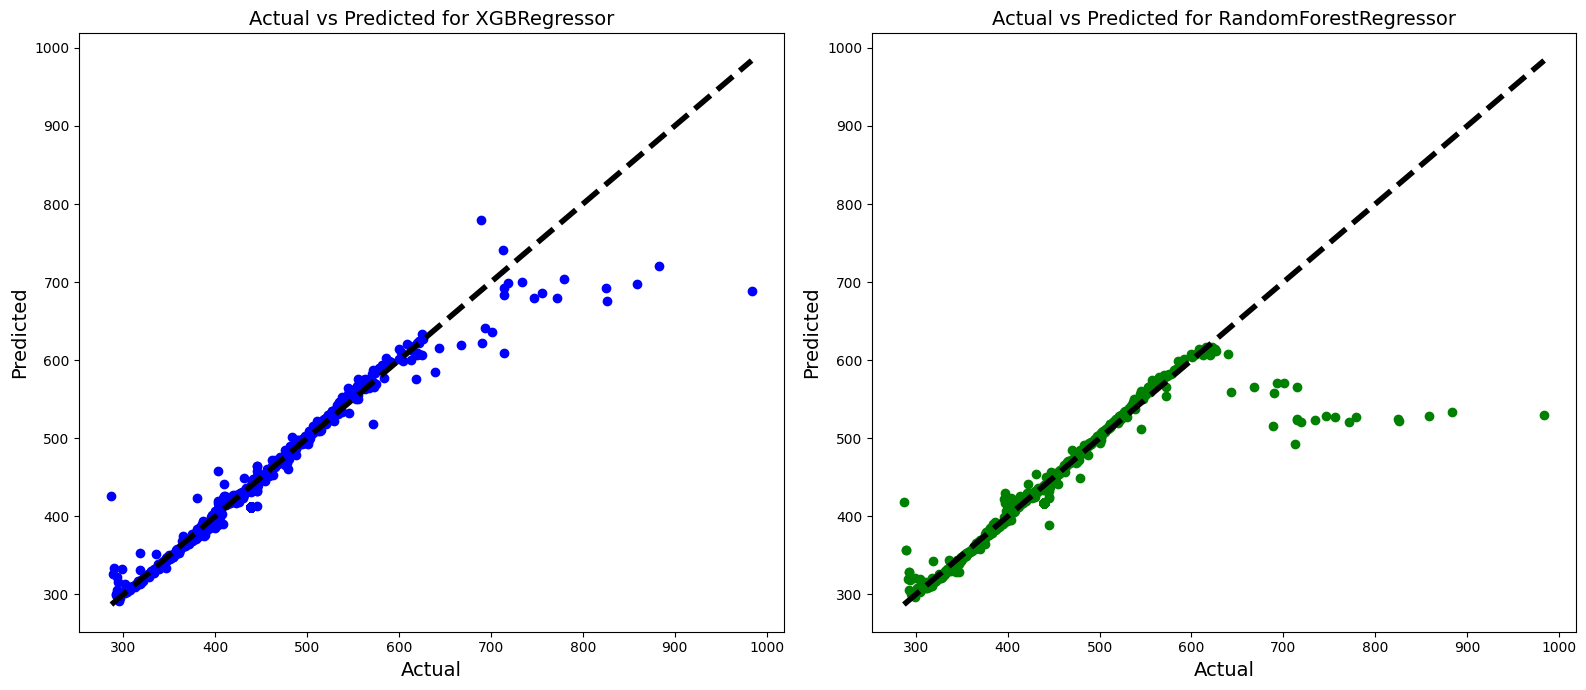

In [79]:
# Assessment of the model's predictive performance.

fig, ax = plt.subplots(1,2, figsize=(16,7))

ax[0].scatter(y_test, xgb_preds, color='Blue')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax[0].set_xlabel('Actual',fontsize = 14)
ax[0].set_ylabel('Predicted',fontsize = 14)
ax[0].set_title("Actual vs Predicted for XGBRegressor", fontsize = 14)

ax[1].scatter(y_test, rf_preds, color='Green')
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax[1].set_xlabel('Actual',fontsize = 14)
ax[1].set_ylabel('Predicted',fontsize = 14)
ax[1].set_title("Actual vs Predicted for RandomForestRegressor", fontsize = 14)

#save the plot
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/regressor-evaluation.png', bbox_inches='tight')

plt.tight_layout()
plt.show()

**Model Evaluation**

In [80]:
xgb_mse = mean_squared_error(y_test, xgb_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

xgb_r2 = r2_score(y_test, xgb_preds)
rf_r2 = r2_score(y_test, rf_preds)

xgb_rmse = np.sqrt(xgb_mse)
rf_rmse = np.sqrt(rf_mse)

list_mse = [xgb_mse,rf_mse]
list_r2 = [xgb_r2,rf_r2]
list_rmse = [xgb_rmse,rf_rmse]

Report = pd.DataFrame(list_mse, index=['XGBRegressor','RandomForestRegressor'])
Report.columns = ['Mean Squared Error']
Report.insert(loc=1, column='R2 Score', value=list_r2)
Report.insert(loc=2, column='Root Mean Squared Error', value=list_rmse)
Report.columns.name = 'Algorithm'
print(Report)


Algorithm              Mean Squared Error  R2 Score  Root Mean Squared Error
XGBRegressor                   552.803245  0.915434                23.511768
RandomForestRegressor         1449.222299  0.778304                38.068652


In [81]:
#Identify the best performing model and create a dataframe with the predicted value added to it.

Predicting_CO2 = pd.DataFrame(y_test)

Predicting_CO2['Predicted_values'] = xgb_preds
Predicting_CO2['Is_Equal'] = (y_test['AvgCO2(g/mi)'] == Predicting_CO2['Predicted_values'])

Predicting_CO2.reset_index(drop=True)

Predicting_CO2.head(5)

AvgCO2(g/mi)  Predicted_values  Is_Equal
471     386.985020        378.314301     False
1453    363.006677        360.345673     False
2377    471.589480        472.055939     False
1601    511.447357        508.762848     False
1094    292.689223        306.205200     False

In [82]:
#Export the test data.
y_test = pd.DataFrame(y_test) #fix the dataset

try:
    y_test.to_csv("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/test_data.csv", index=False)
    print('testing dataset successfully export as CSV format')
except Exception as e:
    print(f'testing dataset failed to export: {e}')


testing dataset successfully export as CSV format


### Conclusion on Regression Model Performance

In evaluating the performance of regression models for predicting CO2 emissions from vehicles, we compared two algorithms: XGBRegressor and RandomForestRegressor. The evaluation metrics used are the Mean Squared Error (MSE), R-squared (R²) score, and Root Mean Squared Error (RMSE). These metrics provide insights into the accuracy and goodness-of-fit of the predictions made by each model.

#### Mean Squared Error (MSE)
- **XGBRegressor**: 552.803245
- **RandomForestRegressor**: 1556.085791

MSE measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted values. Lower values indicate better performance. The XGBRegressor had a significantly lower MSE of 552.803245 compared to the RandomForestRegressor's 1556.085791, indicating that the XGBRegressor made more accurate predictions on average.

#### R-squared (R²) Score
- **XGBRegressor**: 0.915434
- **RandomForestRegressor**: 0.761956 

The R² score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Values closer to 1 indicate better fit. The XGBRegressor achieved an R² score of 0.915434, suggesting it explains approximately 92% of the variance in CO2 emissions. In contrast, the RandomForestRegressor had a lower R² score of 0.761956, explaining about 76% of the variance.

#### Root Mean Squared Error (RMSE)
- **XGBRegressor**: 23.511768
- **RandomForestRegressor**: 39.447253

RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction error, expressed in the same units as the target variable. Lower RMSE values indicate better performance. The XGBRegressor had an RMSE of 23.511768, significantly lower than the RandomForestRegressor's RMSE of 39.447253, reinforcing that the XGBRegressor had smaller prediction errors on average.

### Summary
Based on the evaluation metrics:

- **XGBRegressor** outperformed the RandomForestRegressor across all metrics, with lower MSE and RMSE values and a higher R² score, indicating it makes more accurate predictions and better fits the data.
- **RandomForestRegressor** performed reasonably well but was less accurate and had a poorer fit compared to the XGBRegressor.

Therefore, **XGBRegressor** is the recommended algorithm for predicting CO2 emissions from vehicles due to its superior performance in terms of prediction accuracy and model fit.

# TASK 2. Clustering Vehicles Based on Emissions and Fuel Efficiency

- objective: Group vehicles into clusters based on their CO2 emissions and fuel efficiency metrics.


In [61]:
#Import libraries for unsupervised learning
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score, make_scorer, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

In [62]:
#load data
cluster_data = pd.read_parquet("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/processed/vehicle-analysis.pq")

In [63]:
cluster_data.columns

Index(['Manufacturer', 'ModelYear', 'RegulatoryClass', 'VehicleType',
       'Production', 'ProductionShare', '2Cycle_MPG', 'RealWorld_MPG',
       'RealWorld_MPG_City', 'RealWorld_MPG_Hwy', 'RealWorld_CO2(g/mi)',
       'RealWorld_CO2_City(g/mi)', 'RealWorld_CO2_Hwy(g/mi)', 'Weight(lbs)',
       'FootPrint(sq.ft)', 'EngineDisplacement', 'Horsepower(HP)',
       'Acceleration(0-60_TimeinSeconds)', 'HP/EngineDisplacement',
       'HP/Weight(lbs)', 'Ton_MPG(RealWorld)', 'DrivetrainFront',
       'Drivetrain4WD', 'DrivetrainRear', 'TransmissionManual',
       'TransmissionAutomatic', 'TransmissionLockup',
       'TransmissionCVT_(Hybrid)', 'Transmission_Other',
       'FuelDelivery_Carbureted', 'FuelDelivery_GasolineDirectInjection_(GDI)',
       'FuelDelivery_PortFuelInjection', 'FuelDelivery_ThrottleBodyInjection',
       'FuelDelivery_Other', 'Powertrain_Diesel',
       'Powertrain_ElectricVehicle_(EV)',
       'Powertrain_PluginHybrid_ElectricVehicle_(PHEV)',
       'Powertrain_FuelCe

In [64]:
# select features
features = cluster_data[['Manufacturer', 'ModelYear', 'RegulatoryClass', 'VehicleType','2Cycle_MPG', 'RealWorld_MPG', 
                      'RealWorld_MPG_City', 'RealWorld_MPG_Hwy', 'RealWorld_CO2(g/mi)', 'RealWorld_CO2_City(g/mi)',
                      'RealWorld_CO2_Hwy(g/mi)', 'Ton_MPG(RealWorld)', 'Weight(lbs)', 'FootPrint(sq.ft)',
                      'EngineDisplacement', 'Horsepower(HP)', 'Acceleration(0-60_TimeinSeconds)',
                      'HP/EngineDisplacement', 'HP/Weight(lbs)', 'AvgRealWorld_MPG', 'AvgCO2(g/mi)',
                      'FuelDelivery_Carbureted', 'FuelDelivery_GasolineDirectInjection_(GDI)', 
                      'FuelDelivery_PortFuelInjection', 'FuelDelivery_ThrottleBodyInjection', 
                      'FuelDelivery_Other',
                      ]]

features = features.loc[:, ~features.columns.duplicated()]
features.shape

(2880, 26)

In [65]:
features.head()

Manufacturer  ModelYear RegulatoryClass VehicleType  2Cycle_MPG  \
0         Ford  Old_Model             Car     Car SUV   27.572156   
1         Ford  Old_Model             Car     Car SUV   27.572156   
2         Ford  Old_Model             Car     Car SUV   27.572156   
3         Ford  Old_Model             Car     Car SUV   27.572156   
4         Ford  Old_Model             Car     Car SUV   27.572156   

   RealWorld_MPG  RealWorld_MPG_City  RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  \
0      22.139607           19.554939          25.063002           436.367455   
1      22.139607           19.554939          25.063002           436.367455   
2      22.139607           19.554939          25.063002           436.367455   
3      22.139607           19.554939          25.063002           436.367455   
4      22.139607           19.554939          25.063002           436.367455   

   RealWorld_CO2_City(g/mi)  RealWorld_CO2_Hwy(g/mi)  Ton_MPG(RealWorld)  \
0                496.926752               383.945484           43.352957   
1                496.926752               383.945484           43.352957   
2                496.926752               383.945484           43.352957   
3                496.926752               383.945484           43.352957   
4                496.926752               383.945484           43.352957   

   Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  Horsepower(HP)  \
0  3916.301228         50.270228          187.450322      188.530664   
1  3916.301228         50.270228          187.450322      188.530664   
2  3916.301228         50.270228          187.450322      188.530664   
3  3916.301228         50.270228          187.450322      188.530664   
4  3916.301228         50.270228          187.450322      188.530664   

   Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  HP/Weight(lbs)  \
0                         10.257176               1.038059        0.047028   
1                         10.257176               1.038059        0.047028   
2                         10.257176               1.038059        0.047028   
3                         10.257176               1.038059        0.047028   
4                         10.257176               1.038059        0.047028   

   AvgRealWorld_MPG  AvgCO2(g/mi)  FuelDelivery_Carbureted  \
0         22.252516    439.079897                 0.757492   
1         22.252516    439.079897                 0.757492   
2         22.252516    439.079897                 0.757492   
3         22.252516    439.079897                 0.757492   
4         22.252516    439.079897                 0.757492   

   FuelDelivery_GasolineDirectInjection_(GDI)  FuelDelivery_PortFuelInjection  \
0                                    0.652325                        0.819349   
1                                    0.652325                        0.819349   
2                                    0.652325                        0.819349   
3                                    0.652325                        0.819349   
4                                    0.652325                        0.819349   

   FuelDelivery_ThrottleBodyInjection  FuelDelivery_Other  
0                            0.441275            0.124859  
1                            0.441275            0.124859  
2                            0.441275            0.124859  
3                            0.441275            0.124859  
4                            0.441275            0.124859

In [66]:
# Custom transformer to use LabelEncoder in a pipeline

class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoders = {}

    def fit(self, X, y=None):
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.label_encoders[col] = le
        return self

    def transform(self, X):
        x = X.copy()
        for col in x.columns:
            x[col] = self.label_encoders[col].transform(x[col])
        return x



In [69]:
# Split numerical and categorical values
Num_features = features.select_dtypes(include=['int64', 'float']).columns
Cat_features = features.select_dtypes(include=['object']).columns

# Define the transformers
Cat_transformer = Pipeline(steps=[('label_encoder', LabelEncoderTransformer())])
Num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Cat_transformer, Cat_features),
        ('num', Num_transformer, Num_features),
    ]
)
# Fit the preprocessor
preprocessor.fit(features)

# Transform the features
transformed_features = preprocessor.transform(features)

# Combine the column names of the transformed features
transformed_feature_names = list(Cat_features) + list(Num_features)

# Convert the transformed features to a DataFrame
X = pd.DataFrame(transformed_features, columns=transformed_feature_names)

# Check the shape of the transformed DataFrame
print('Dimension of X:', X.shape)
print('Column names:', X.columns)



Dimension of X: (2880, 26)
Column names: Index(['Manufacturer', 'ModelYear', 'RegulatoryClass', 'VehicleType',
       '2Cycle_MPG', 'RealWorld_MPG', 'RealWorld_MPG_City',
       'RealWorld_MPG_Hwy', 'RealWorld_CO2(g/mi)', 'RealWorld_CO2_City(g/mi)',
       'RealWorld_CO2_Hwy(g/mi)', 'Ton_MPG(RealWorld)', 'Weight(lbs)',
       'FootPrint(sq.ft)', 'EngineDisplacement', 'Horsepower(HP)',
       'Acceleration(0-60_TimeinSeconds)', 'HP/EngineDisplacement',
       'HP/Weight(lbs)', 'AvgRealWorld_MPG', 'AvgCO2(g/mi)',
       'FuelDelivery_Carbureted', 'FuelDelivery_GasolineDirectInjection_(GDI)',
       'FuelDelivery_PortFuelInjection', 'FuelDelivery_ThrottleBodyInjection',
       'FuelDelivery_Other'],
      dtype='object')


Clustering analysis

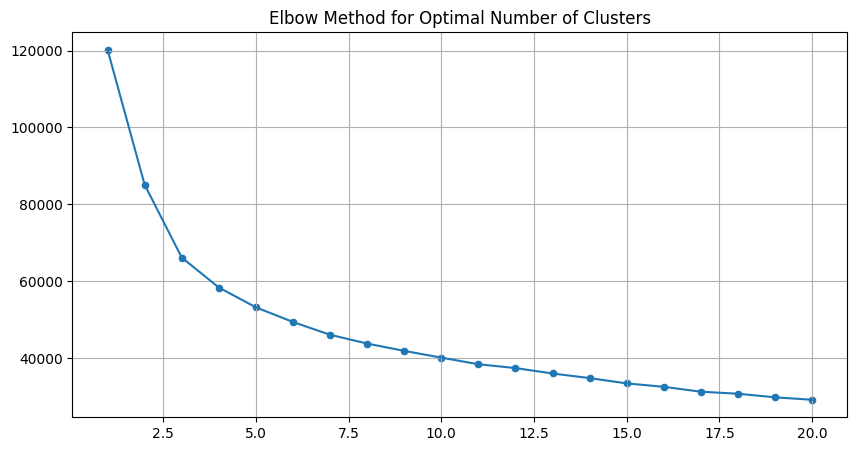

In [70]:
error = []

for n_clusters in range(1, 21):
    KM_model = KMeans(init='random', n_clusters = n_clusters, max_iter = 400, random_state = 10)
    KM_model.fit(X)
    error.append(KM_model.inertia_)
    
# plot the elbow curve     
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,21), y=error)
sns.scatterplot(x=range(1,21), y=error)

plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
#save the plot
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/Elbow-curve-cluster.png')
plt.show()

Using the elbow method to determine the optimal number of clusters, we can identify \( K = 5 \), which represents the ideal number of clusters. Beyond \( K = 5 \), the value of inertia does not decrease significantly, indicating that additional clusters do not improve the model substantially.

In [71]:
# finding best parameters for dimensionality reduction for the dataset.       
model_params = {  
    'TSNE': {
        'model': TSNE(),
        'params': {
            'perplexity': [5, 10, 30],
            'n_iter': [300, 500, 1000],
            'learning_rate': [10.0, 50.0, 1000.0]
        },
        'scoring': silhouette_score
    },
}        
#finding the best cluster estimator
best_estimators = {}
for model_name, params in model_params.items():
    try:
        model = params['model']
        param_grid = params['params']
        scoring = params['scoring']
        
        grid_search = GridSearchCV(model, param_grid, scoring=scoring)
        grid_search.fit(X)

        best_estimators[model_name] = grid_search.best_estimator_
        print(f'Best estimators {model_name}: {grid_search.best_estimator_}')
       
    except Exception as e:
        print(f'Error occured in Hyperparameter tuning {model_name}: {str(e)}')

Best estimators TSNE: TSNE(learning_rate=10.0, n_iter=300, perplexity=5)


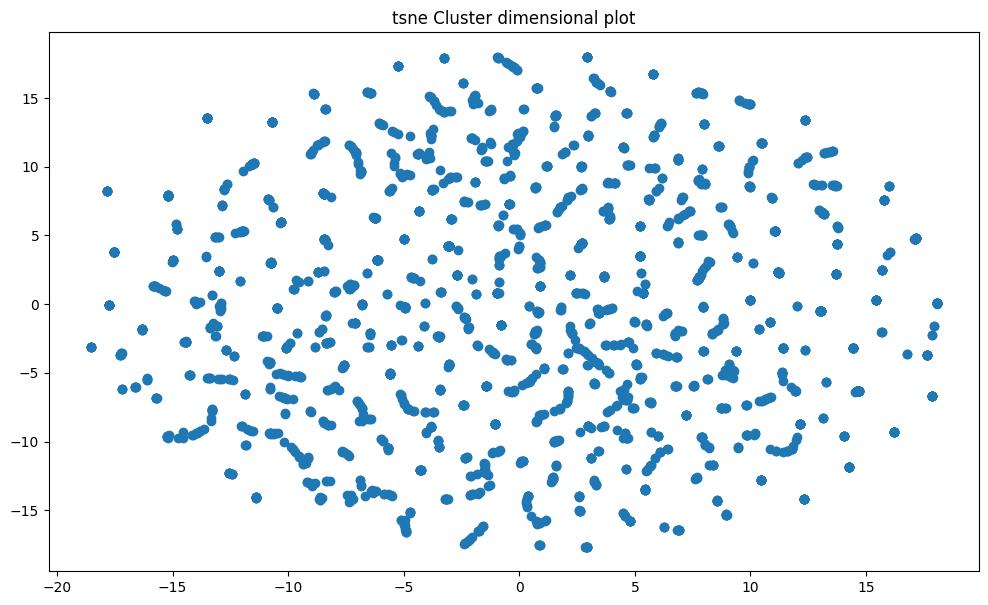

In [72]:
"""
I will be using T-distributed Stochastic Neighbor Embedding. It helps in visualizing high dimensional
data. It converts similarities between data points to joint probabilities and tries to
minimize the values to low-dimensional embedding.
"""

tsne_model = TSNE(n_components=2, perplexity=5, n_iter=400, learning_rate=10.0, random_state=42)
tsne_df = tsne_model.fit_transform(X)

plt.figure(figsize=(12,7))
plt.scatter(tsne_df[:,0], tsne_df[:,1])
plt.title('tsne Cluster dimensional plot')
plt.show()

KMeans Clustering Algorithm

In [73]:
# fit the KMeans model with the optimal number of cluster
KM_model = KMeans(init='k-means++', n_clusters=4, n_init=300, max_iter=400, random_state=42)
KM_labels = KM_model.fit_predict(X)

#add cluster to the dataframe
#cluster_data["cluster"] = KM_labels

#print the dimension of cluster labels
print(f'Length of KMeans-cluster for CO2 Emission: {len(KM_labels)}')
print(f"shape of tsne_df: {tsne_df.shape}")

Length of KMeans-cluster for CO2 Emission: 2880
shape of tsne_df: (2880, 2)


In [75]:
cluster_data.head()

Manufacturer  ModelYear RegulatoryClass VehicleType  Production  \
0         Ford  Old_Model             Car     Car SUV  333.096941   
1         Ford  Old_Model             Car     Car SUV  333.096941   
2         Ford  Old_Model             Car     Car SUV  333.096941   
3         Ford  Old_Model             Car     Car SUV  333.096941   
4         Ford  Old_Model             Car     Car SUV  333.096941   

   ProductionShare  2Cycle_MPG  RealWorld_MPG  RealWorld_MPG_City  \
0         0.024358   27.572156      22.139607           19.554939   
1         0.024358   27.572156      22.139607           19.554939   
2         0.024358   27.572156      22.139607           19.554939   
3         0.024358   27.572156      22.139607           19.554939   
4         0.024358   27.572156      22.139607           19.554939   

   RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  RealWorld_CO2_City(g/mi)  \
0          25.063002           436.367455                496.926752   
1          25.063002           436.367455                496.926752   
2          25.063002           436.367455                496.926752   
3          25.063002           436.367455                496.926752   
4          25.063002           436.367455                496.926752   

   RealWorld_CO2_Hwy(g/mi)  Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  \
0               383.945484  3916.301228         50.270228          187.450322   
1               383.945484  3916.301228         50.270228          187.450322   
2               383.945484  3916.301228         50.270228          187.450322   
3               383.945484  3916.301228         50.270228          187.450322   
4               383.945484  3916.301228         50.270228          187.450322   

   Horsepower(HP)  Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  \
0      188.530664                         10.257176               1.038059   
1      188.530664                         10.257176               1.038059   
2      188.530664                         10.257176               1.038059   
3      188.530664                         10.257176               1.038059   
4      188.530664                         10.257176               1.038059   

   HP/Weight(lbs)  Ton_MPG(RealWorld)  DrivetrainFront  Drivetrain4WD  \
0        0.047028           43.352957         0.723129       0.501504   
1        0.047028           43.352957         0.723129       0.501504   
2        0.047028           43.352957         0.723129       0.501504   
3        0.047028           43.352957         0.723129       0.501504   
4        0.047028           43.352957         0.723129       0.501504   

   DrivetrainRear  TransmissionManual  TransmissionAutomatic  \
0         0.46806            0.246137               0.305307   
1         0.46806            0.246137               0.305307   
2         0.46806            0.246137               0.305307   
3         0.46806            0.246137               0.305307   
4         0.46806            0.246137               0.305307   

   TransmissionLockup  TransmissionCVT_(Hybrid)  Transmission_Other  \
0            0.787847                  0.067078            0.052545   
1            0.787847                  0.067078            0.052545   
2            0.787847                  0.067078            0.052545   
3            0.787847                  0.067078            0.052545   
4            0.787847                  0.067078            0.052545   

   FuelDelivery_Carbureted  FuelDelivery_GasolineDirectInjection_(GDI)  \
0                 0.757492                                    0.652325   
1                 0.757492                                    0.652325   
2                 0.757492                                    0.652325   
3                 0.757492                                    0.652325   
4                 0.757492                                    0.652325   

   FuelDelivery_PortFuelInjection  FuelDelivery_ThrottleBodyInjection  \
0                   

In [76]:
#calculate the centroids of (Mean of the data points)
KM_unique_labels = np.unique(KM_labels)
KM_Centroids = np.array([tsne_df[KM_labels == label].mean(axis=0) for label in KM_unique_labels])

cluster_data.head()

Manufacturer  ModelYear RegulatoryClass VehicleType  Production  \
0         Ford  Old_Model             Car     Car SUV  333.096941   
1         Ford  Old_Model             Car     Car SUV  333.096941   
2         Ford  Old_Model             Car     Car SUV  333.096941   
3         Ford  Old_Model             Car     Car SUV  333.096941   
4         Ford  Old_Model             Car     Car SUV  333.096941   

   ProductionShare  2Cycle_MPG  RealWorld_MPG  RealWorld_MPG_City  \
0         0.024358   27.572156      22.139607           19.554939   
1         0.024358   27.572156      22.139607           19.554939   
2         0.024358   27.572156      22.139607           19.554939   
3         0.024358   27.572156      22.139607           19.554939   
4         0.024358   27.572156      22.139607           19.554939   

   RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  RealWorld_CO2_City(g/mi)  \
0          25.063002           436.367455                496.926752   
1          25.063002           436.367455                496.926752   
2          25.063002           436.367455                496.926752   
3          25.063002           436.367455                496.926752   
4          25.063002           436.367455                496.926752   

   RealWorld_CO2_Hwy(g/mi)  Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  \
0               383.945484  3916.301228         50.270228          187.450322   
1               383.945484  3916.301228         50.270228          187.450322   
2               383.945484  3916.301228         50.270228          187.450322   
3               383.945484  3916.301228         50.270228          187.450322   
4               383.945484  3916.301228         50.270228          187.450322   

   Horsepower(HP)  Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  \
0      188.530664                         10.257176               1.038059   
1      188.530664                         10.257176               1.038059   
2      188.530664                         10.257176               1.038059   
3      188.530664                         10.257176               1.038059   
4      188.530664                         10.257176               1.038059   

   HP/Weight(lbs)  Ton_MPG(RealWorld)  DrivetrainFront  Drivetrain4WD  \
0        0.047028           43.352957         0.723129       0.501504   
1        0.047028           43.352957         0.723129       0.501504   
2        0.047028           43.352957         0.723129       0.501504   
3        0.047028           43.352957         0.723129       0.501504   
4        0.047028           43.352957         0.723129       0.501504   

   DrivetrainRear  TransmissionManual  TransmissionAutomatic  \
0         0.46806            0.246137               0.305307   
1         0.46806            0.246137               0.305307   
2         0.46806            0.246137               0.305307   
3         0.46806            0.246137               0.305307   
4         0.46806            0.246137               0.305307   

   TransmissionLockup  TransmissionCVT_(Hybrid)  Transmission_Other  \
0            0.787847                  0.067078            0.052545   
1            0.787847                  0.067078            0.052545   
2            0.787847                  0.067078            0.052545   
3            0.787847                  0.067078            0.052545   
4            0.787847                  0.067078            0.052545   

   FuelDelivery_Carbureted  FuelDelivery_GasolineDirectInjection_(GDI)  \
0                 0.757492                                    0.652325   
1                 0.757492                                    0.652325   
2                 0.757492                                    0.652325   
3                 0.757492                                    0.652325   
4                 0.757492                                    0.652325   

   FuelDelivery_PortFuelInjection  FuelDelivery_ThrottleBodyInjection  \
0                   

In [77]:
# Visualize the clusters
import plotly.express as px
import plotly.graph_objects as go


# Create a scatter plot of the data points
fig = px.scatter(
    x=tsne_df[:, 0], 
    y=tsne_df[:, 1], 
    color=KM_labels, 
    title='Clusters of Vehicles based on CO2 Emissions and Fuel Efficiency (KMeans Clustering)',
    labels={'x': 'CO2 Emissions (g/mi)', 'y': 'Real World MPG'},
    color_continuous_scale='plasma'
)

# Add the centroids to the plot
fig.add_trace(go.Scatter(
    x=KM_Centroids[:, 0], 
    y=KM_Centroids[:, 1], 
    mode='markers', 
    marker=dict(symbol='x', size=12, color='Black'),
    name='Centroids'
))

# Update layout for better visibility
fig.update_layout(
    xaxis_title='CO2 Emissions (g/mi)',
    yaxis_title='Real World MPG',
    legend= dict(
        x=0.8,
        y=0.1
    ),
    width=1000,  
    height=800
)

# Save the plot as a PNG file
fig.write_image('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/KMeans-cluster.png')

# Show the plot
fig.show()

In [78]:
# Model evaluation
silhouette_avg_kmeans = silhouette_score(X, KM_labels).round(3)
calinski_harabasz_kmeans = calinski_harabasz_score(X, KM_labels).round(3)
davies_bouldin_kmeans = davies_bouldin_score(X, KM_labels).round(3)

print("KMeans Silhouette Score: ", silhouette_avg_kmeans)
print("KMeans Calinski-Harabasz Index: ", calinski_harabasz_kmeans)
print("KMeans Davies-Bouldin Index: ", davies_bouldin_kmeans)

KMeans Silhouette Score:  0.204
KMeans Calinski-Harabasz Index:  1016.065
KMeans Davies-Bouldin Index:  1.308


Agglomerative Clustering Algorithm

In [79]:
# fit the agglomerative model with the optimal number of cluster
Agglo_model = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean', compute_distances=False,)
Agglo_labels = Agglo_model.fit_predict(X)

#print the dimension of cluster labels
print(f'Length of Agglomerative-cluster for CO2 Emission: {len(Agglo_labels)}')
print(f"shape of tsne_df: {tsne_df.shape}")

Length of Agglomerative-cluster for CO2 Emission: 2880
shape of tsne_df: (2880, 2)


In [81]:
# Calculate the centroids (mean of the points in each cluster)
Agglo_unique_labels = np.unique(Agglo_labels)
Agglo_centroids = np.array([tsne_df[Agglo_labels == label].mean(axis=0) for label in Agglo_unique_labels])

# Create a scatter plot of the data points
fig = px.scatter(
    x=tsne_df[:, 0], 
    y=tsne_df[:, 1], 
    color=Agglo_labels, 
    title='Clusters of Vehicles based on CO2 Emissions and Fuel Efficiency (Agglomerative Clustering)',
    labels={'x': 'CO2 Emissions (g/mi)', 'y': 'Real World MPG'},
    color_continuous_scale='Viridis'
)

# Add the centroids to the plot
fig.add_trace(go.Scatter(
    x=Agglo_centroids[:, 0], 
    y=Agglo_centroids[:, 1], 
    mode='markers', 
    marker=dict(symbol='x', size=12, color='Red'),
    name='Centroids'
))

# Update layout for better visibility, adjust the figure size, and position the legend
fig.update_layout(
    xaxis_title='CO2 Emissions (g/mi)',
    yaxis_title='Real World MPG',
    width=1200, 
    height=800,  
    legend=dict(
        x=0.8,   
        y=0.1
    )
)

# Save the plot as a PNG file
fig.write_image('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/Agglo-cluster.png')

# Show the plot
fig.show()

In [82]:
# Model evaluation
silhouette_avg_agglo = silhouette_score(X, Agglo_labels).round(3)
calinski_harabasz_agglo = calinski_harabasz_score(X, Agglo_labels).round(3)
davies_bouldin_agglo = davies_bouldin_score(X, Agglo_labels).round(3)

print("Agglomerative cluster Silhouette Score: ", silhouette_avg_agglo)
print("Agglomerative cluster Calinski-Harabasz Index: ", calinski_harabasz_agglo)
print("Agglomerative cluster Davies-Bouldin Index: ", davies_bouldin_agglo)

Agglomerative cluster Silhouette Score:  0.188
Agglomerative cluster Calinski-Harabasz Index:  912.691
Agglomerative cluster Davies-Bouldin Index:  1.347


Gaussian Mixture clustering algorithm

In [83]:
# fit the Gaussian Mixture model with the optimal number of cluster
Gmm_model = GaussianMixture(n_components=4, init_params='kmeans',covariance_type='tied', random_state=42)
Gmm_labels = Gmm_model.fit_predict(X)

#print the dimension of cluster labels
print(f'Length of Gaussian Mixture-cluster for CO2 Emission: {len(Gmm_labels)}')
print(f"shape of tsne_df: {tsne_df.shape}")

Length of Gaussian Mixture-cluster for CO2 Emission: 2880
shape of tsne_df: (2880, 2)


In [89]:
# Calculate the centroids
Gmm_unique_labels = np.unique(Gmm_labels)
Gmm_centroids = np.array([tsne_df[Gmm_labels == label].mean(axis=0) for label in Gmm_unique_labels])

# Create a scatter plot of the data points
fig = px.scatter(
    x=tsne_df[:, 0],
    y=tsne_df[:, 1],
    color = Gmm_labels,
    title = 'Clusters of vehicles based on CO2 Emissions and Fuel efficiency (Gaussian Mixture Clustering)',
    labels = {'x':'CO2 Emissions (g/mi)', 'y':'Real World MPG'},
    color_continuous_scale = 'plasma'
)

# Add the centriods to the plot
fig.add_trace(go.Scatter(
    x= Gmm_centroids[:, 0],
    y= Gmm_centroids[:, 1],
    mode = 'markers',
    marker= dict(symbol='x', size=12, color='Red'),
    name = 'Centroids'
))

# To update the layout 
fig.update_layout(
    xaxis_title = 'CO2 Emission (g/mi)',
    yaxis_title = 'Real World MPG',
    width = 1100,
    height = 900,
    legend = dict(
        x=0.8,
        y=0.1
    )
)

# save the plot 
fig.write_image('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/Gmm-cluster.png')

# show the plot
fig.show()

In [86]:
# Model evaluation
silhouette_avg_gmm = silhouette_score(X, Gmm_labels).round(3)
calinski_harabasz_gmm = calinski_harabasz_score(X, Gmm_labels).round(3)
davies_bouldin_gmm = davies_bouldin_score(X, Gmm_labels).round(3)

print("Gaussian Mixture cluster Silhouette Score: ", silhouette_avg_gmm)
print("Gaussian Mixture cluster Calinski-Harabasz Index: ", calinski_harabasz_gmm)
print("Gaussian Mixture cluster Davies-Bouldin Index: ", davies_bouldin_gmm)

Gaussian Mixture cluster Silhouette Score:  0.266
Gaussian Mixture cluster Calinski-Harabasz Index:  813.698
Gaussian Mixture cluster Davies-Bouldin Index:  1.262


In [87]:
# Additional pairplot to visualize other metrics
#sns.pairplot(bard_data, hue='Cluster', vars=['Real_World_CO2_(g/mi)', 'Real_World_MPG', 'Real_World_MPG_City', 'Real_World_MPG_Hwy'], palette='viridis')


In [92]:
# Adding the cluster to the dataframe
cluster_bin = {
    0:'Low Emission',
    1:'Medium Emission',
    2:'High Emission',
    3:'Very High Emission'
}
cluster_data['cluster'] = Gmm_labels

cluster_data['cluster_bin'] = cluster_data['cluster'].map(cluster_bin)

print(cluster_data['cluster'])

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      2
49      2
50      2
51      2
52      2
53      2
54      2
55      2
56      2
57      2
58      2
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      2
97      2
98      2
99      2


In [93]:
cluster_data.head()

Manufacturer  ModelYear RegulatoryClass VehicleType  Production  \
0         Ford  Old_Model             Car     Car SUV  333.096941   
1         Ford  Old_Model             Car     Car SUV  333.096941   
2         Ford  Old_Model             Car     Car SUV  333.096941   
3         Ford  Old_Model             Car     Car SUV  333.096941   
4         Ford  Old_Model             Car     Car SUV  333.096941   

   ProductionShare  2Cycle_MPG  RealWorld_MPG  RealWorld_MPG_City  \
0         0.024358   27.572156      22.139607           19.554939   
1         0.024358   27.572156      22.139607           19.554939   
2         0.024358   27.572156      22.139607           19.554939   
3         0.024358   27.572156      22.139607           19.554939   
4         0.024358   27.572156      22.139607           19.554939   

   RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  RealWorld_CO2_City(g/mi)  \
0          25.063002           436.367455                496.926752   
1          25.063002           436.367455                496.926752   
2          25.063002           436.367455                496.926752   
3          25.063002           436.367455                496.926752   
4          25.063002           436.367455                496.926752   

   RealWorld_CO2_Hwy(g/mi)  Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  \
0               383.945484  3916.301228         50.270228          187.450322   
1               383.945484  3916.301228         50.270228          187.450322   
2               383.945484  3916.301228         50.270228          187.450322   
3               383.945484  3916.301228         50.270228          187.450322   
4               383.945484  3916.301228         50.270228          187.450322   

   Horsepower(HP)  Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  \
0      188.530664                         10.257176               1.038059   
1      188.530664                         10.257176               1.038059   
2      188.530664                         10.257176               1.038059   
3      188.530664                         10.257176               1.038059   
4      188.530664                         10.257176               1.038059   

   HP/Weight(lbs)  Ton_MPG(RealWorld)  DrivetrainFront  Drivetrain4WD  \
0        0.047028           43.352957         0.723129       0.501504   
1        0.047028           43.352957         0.723129       0.501504   
2        0.047028           43.352957         0.723129       0.501504   
3        0.047028           43.352957         0.723129       0.501504   
4        0.047028           43.352957         0.723129       0.501504   

   DrivetrainRear  TransmissionManual  TransmissionAutomatic  \
0         0.46806            0.246137               0.305307   
1         0.46806            0.246137               0.305307   
2         0.46806            0.246137               0.305307   
3         0.46806            0.246137               0.305307   
4         0.46806            0.246137               0.305307   

   TransmissionLockup  TransmissionCVT_(Hybrid)  Transmission_Other  \
0            0.787847                  0.067078            0.052545   
1            0.787847                  0.067078            0.052545   
2            0.787847                  0.067078            0.052545   
3            0.787847                  0.067078            0.052545   
4            0.787847                  0.067078            0.052545   

   FuelDelivery_Carbureted  FuelDelivery_GasolineDirectInjection_(GDI)  \
0                 0.757492                                    0.652325   
1                 0.757492                                    0.652325   
2                 0.757492                                    0.652325   
3                 0.757492                                    0.652325   
4                 0.757492                                    0.652325   

   FuelDelivery_PortFuelInjection  FuelDelivery_ThrottleBodyInjection  \
0                   

In [90]:
# showing evaluation result as a table

list_Silhouette_Score = [silhouette_avg_agglo, silhouette_avg_gmm, silhouette_avg_kmeans]
list_Calinski_Harabasz_Index = [calinski_harabasz_agglo, calinski_harabasz_gmm,calinski_harabasz_kmeans]
list_Davies_Bouldin_Index = [davies_bouldin_agglo, davies_bouldin_gmm, davies_bouldin_kmeans]

Report = pd.DataFrame(list_Silhouette_Score, index=['Agglomerative Clustering','Gaussian Mixture','KMeans'])
Report.columns = ['Silhouette Score']
Report.insert(loc=1, column='Calinski-Harabasz Index', value=list_Calinski_Harabasz_Index)
Report.insert(loc=2, column='Davies-Bouldin Index', value=list_Davies_Bouldin_Index)
Report.columns.name = 'Algorithm'
print(Report)


Algorithm                 Silhouette Score  Calinski-Harabasz Index  \
Agglomerative Clustering             0.188                  912.691   
Gaussian Mixture                     0.266                  813.698   
KMeans                               0.204                 1016.065   

Algorithm                 Davies-Bouldin Index  
Agglomerative Clustering                 1.347  
Gaussian Mixture                         1.262  
KMeans                                   1.308  


**Saving the models with their Hyperparameters**

In [91]:
#save the models.
joblib.dump(Gmm_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/GMM_model.pkl')

joblib.dump(KM_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/Kmeans-cluster_model.pkl')

print('Models saved successfully')

Models saved successfully


### Conclusion on Clustering Algorithm Performance

In evaluating the performance of clustering algorithms for grouping vehicles based on their CO2 emissions and fuel efficiency metrics, we have considered three algorithms: Agglomerative Clustering, Gaussian Mixture, and KMeans. The evaluation metrics used are the Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index. These metrics provide insights into the cohesion and separation of the clusters formed by each algorithm.

#### Silhouette Score
- **Agglomerative Clustering**: 0.188
- **Gaussian Mixture**: 0.266
- **KMeans**: 0.204

The Silhouette Score measures the compactness and separation of the clusters, with higher values indicating better-defined clusters. Gaussian Mixture achieved the highest Silhouette Score of 0.266, suggesting well-separated and cohesive clusters. KMeans performed reasonably well with a score of 0.204, while Agglomerative Clustering had the lowest score of 0.188, indicating less well-defined clusters.

#### Calinski-Harabasz Index
- **Agglomerative Clustering**: 912.691
- **Gaussian Mixture**: 813.698
- **KMeans**: 1016.065

The Calinski-Harabasz Index evaluates the ratio of the sum of between-cluster dispersion and within-cluster dispersion, with higher values indicating better clustering performance. KMeans had the highest index value of 1016.065, indicating the best performance in this metric. Agglomerative Clustering followed with a value of 912.691, while Gaussian Mixture had the lowest value of 813.698.

#### Davies-Bouldin Index
- **Agglomerative Clustering**: 1.347
- **Gaussian Mixture**: 1.262
- **KMeans**: 1.308

The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster, with lower values indicating better clustering performance. Gaussian Mixture had the lowest Davies-Bouldin Index of 1.262, suggesting the best performance among the three algorithms. KMeans followed with an index of 1.308, while Agglomerative Clustering had the highest index value of 1.347, indicating the poorest performance in terms of cluster separation and cohesion.

### Summary
Based on the evaluation metrics:

- **Agglomerative Clustering** performed well in the Calinski-Harabasz Index, making it a viable option for clustering vehicles based on CO2 emissions and fuel efficiency, although it lagged behind in the other metrics.
- **KMeans** showed strong performance, especially in the Calinski-Harabasz Index, indicating effective clustering, though it was slightly behind Gaussian Mixture in the Silhouette Score and Davies-Bouldin Index.
- **Gaussian Mixture** excelled in the Silhouette Score and Davies-Bouldin Index, indicating well-separated and cohesive clusters, though it was less effective in the Calinski-Harabasz Index.

Therefore, **Gaussian Mixture** is the recommended algorithm for grouping vehicles based on their CO2 emissions and fuel efficiency metrics due to its superior performance in the Silhouette Score and Davies-Bouldin Index. **KMeans** is also a strong contender with excellent performance in the Calinski-Harabasz Index. **Agglomerative Clustering**, while useful, performed less effectively in this analysis compared to the other two algorithms.

# TASK 3. Anomaly Detection in Vehicle Emissions (Anomaly Detection)
Objective:
Detect vehicles with unusually high or low CO2 emissions compared to similar vehicles.

In [134]:
import pycaret
import umap
from pycaret.anomaly import*
import os


In [138]:
# load the preprocessed dataset
anomaly_det = setup(data=X)

Isolation Forest Algorithm for anomaly detection

In [139]:
# specify path to save plot
save_dir = 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image'
os.chdir(save_dir)

# create an Isolation forest model
iforest_model = create_model('iforest')

# plot the model
plot_model(iforest_model, save=True, plot="tsne")

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

't-SNE (3d) Dimension Plot.png'

In [140]:
# predict anomalies using the Iforest model
iforest_preds = predict_model(iforest_model, data=X)
# show first 5 predictions
iforest_preds[:5]

Manufacturer  ModelYear  RegulatoryClass  VehicleType    2Cycle_MPG  \
0           1.0        1.0              0.0          0.0  6.104266e-16   
1           1.0        1.0              0.0          0.0  6.104266e-16   
2           1.0        1.0              0.0          0.0  6.104266e-16   
3           1.0        1.0              0.0          0.0  6.104266e-16   
4           1.0        1.0              0.0          0.0  6.104266e-16   

   RealWorld_MPG  RealWorld_MPG_City  RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  \
0   4.194663e-16                 0.0      -4.234843e-16                  0.0   
1   4.194663e-16                 0.0      -4.234843e-16                  0.0   
2   4.194663e-16                 0.0      -4.234843e-16                  0.0   
3   4.194663e-16                 0.0      -4.234843e-16                  0.0   
4   4.194663e-16                 0.0      -4.234843e-16                  0.0   

   RealWorld_CO2_City(g/mi)  RealWorld_CO2_Hwy(g/mi)  Ton_MPG(RealWorld)  \
0                       0.0                      0.0       -3.470145e-16   
1                       0.0                      0.0       -3.470145e-16   
2                       0.0                      0.0       -3.470145e-16   
3                       0.0                      0.0       -3.470145e-16   
4                       0.0                      0.0       -3.470145e-16   

    Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  Horsepower(HP)  \
0 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   
1 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   
2 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   
3 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   
4 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   

   Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  HP/Weight(lbs)  \
0                     -7.834215e-16                    0.0             0.0   
1                     -7.834215e-16                    0.0             0.0   
2                     -7.834215e-16                    0.0             0.0   
3                     -7.834215e-16                    0.0             0.0   
4                     -7.834215e-16                    0.0             0.0   

   AvgRealWorld_MPG  AvgCO2(g/mi)  FuelDelivery_Carbureted  \
0               0.0           0.0            -8.784056e-16   
1               0.0           0.0            -8.784056e-16   
2               0.0           0.0            -8.784056e-16   
3               0.0           0.0            -8.784056e-16   
4               0.0           0.0            -8.784056e-16   

   FuelDelivery_GasolineDirectInjection_(GDI)  FuelDelivery_PortFuelInjection  \
0                                         0.0                   -4.766957e-16   
1                                         0.0                   -4.766957e-16   
2                                         0.0                   -4.766957e-16   
3                                         0.0                   -4.766957e-16   
4                                         0.0                   -4.766957e-16   

   FuelDelivery_ThrottleBodyInjection  FuelDelivery_Other  Anomaly  \
0                        6.335364e-16        2.994611e-16        0   
1                        6.335364e-16        2.994611e-16        0   
2                        6.335364e-16        2.994611e-16        0   
3                        6.335364e-16        2.994611e-16        0   
4                        6.335364e-16        2.994611e-16        0   

   Anomaly_Score  
0      -0.178535  
1      -0.178535  
2      -0.178535  
3      -0.178535  
4      -0.178535

In [141]:
# filter the anomalies detected by Iforest model
iforest_anomalies = iforest_preds[iforest_preds['Anomaly'] == 1]
# print the number of anomalies detected
print('Number of anomalies detected:', len(iforest_anomalies))

iforest_anomalies[:5]

Number of anomalies detected: 144


Manufacturer  ModelYear  RegulatoryClass  VehicleType  2Cycle_MPG  \
47           1.0        2.0              0.0          0.0    2.209210   
48           1.0        1.0              1.0          1.0   -1.286797   
49           1.0        1.0              1.0          1.0   -1.213541   
51           1.0        1.0              1.0          1.0   -1.076271   
52           1.0        1.0              1.0          1.0   -1.327716   

    RealWorld_MPG  RealWorld_MPG_City  RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  \
47       1.993436            1.981262           1.886797            -2.533680   
48      -1.348913           -1.098270          -1.587746             4.183668   
49      -1.262280           -1.028527          -1.475966             3.617849   
51      -1.105510           -0.846793          -1.368855             2.759154   
52      -1.397147           -1.128541          -1.664107             4.533621   

    RealWorld_CO2_City(g/mi)  RealWorld_CO2_Hwy(g/mi)  Ton_MPG(RealWorld)  \
47                 -2.797263                -2.264541            3.140735   
48                  3.857824                 4.296929           -1.018874   
49                  3.357169                 3.651947           -0.953470   
51                  2.286816                 3.117484           -0.824894   
52                  4.094559                 4.800176           -0.928663   

    Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  Horsepower(HP)  \
47     0.271747     -6.707563e-01           -1.618966        0.445807   
48     0.372740      4.591403e-15            3.057162       -0.688507   
49     0.280418      4.591403e-15            3.088746       -0.631399   
51     0.292341      4.591403e-15            3.079590       -0.740592   
52     1.272643      4.591403e-15            3.104294       -0.432230   

    Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  HP/Weight(lbs)  \
47                     -1.266663e+00               2.420743        0.510910   
48                     -7.834215e-16              -2.149339       -1.115989   
49                     -7.834215e-16              -2.114741       -0.976844   
51                      1.351053e+00              -2.165533       -1.135074   
52                      1.828421e+00              -1.984894       -1.192134   

    AvgRealWorld_MPG  AvgCO2(g/mi)  FuelDelivery_Carbureted  \
47          1.962820     -2.565426            -8.784056e-16   
48         -1.347833      4.132836             1.918717e+00   
49         -1.258308      3.561766             1.918717e+00   
51         -1.108688      2.720128             1.918717e+00   
52         -1.399409      4.491912             1.918717e+00   

    FuelDelivery_GasolineDirectInjection_(GDI)  \
47                                   -0.841548   
48                                    0.000000   
49                                    0.000000   
51                                    0.000000   
52                                    0.000000   

    FuelDelivery_PortFuelInjection  FuelDelivery_ThrottleBodyInjection  \
47                   -2.594890e+00                        6.335364e-16   
48                   -4.766957e-16                        6.335364e-16   
49                   -4.766957e-16                        6.335364e-16   
51                   -4.766957e-16                        6.335364e-16   
52                   -4.766957e-16                        6.335364e-16   

    FuelDelivery_Other  Anomaly  Anomaly_Score  
47        1.414913e+00        1       0.095924  
48        2.994611e-16        1       0.077084  
49        2.994611e-16        1       0.045999  
51        2.994611e-16        1       0.001736  
52        2.994611e-16        1       0.088089

In [142]:
#Model Evaluation
iforest_evaluation = evaluate_model(iforest_model)

iforest_evaluation

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [146]:
#save the models.
joblib.dump(iforest_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/iforest_model.pkl')

print('Models saved successfully')

Models saved successfully


KNN Algorithm for anomaly detection

In [147]:
# specify path to save plot
save_dir = 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image'
os.chdir(save_dir)

# create the KNN model
knn_model = create_model('knn')

# plot the model
plot_model(knn_model, save=True, plot="tsne")

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

't-SNE (3d) Dimension Plot.png'

In [148]:
# Predict anomalies using KNN model
knn_preds = predict_model(knn_model, data=X)

knn_preds[:5]

Manufacturer  ModelYear  RegulatoryClass  VehicleType    2Cycle_MPG  \
0           1.0        1.0              0.0          0.0  6.104266e-16   
1           1.0        1.0              0.0          0.0  6.104266e-16   
2           1.0        1.0              0.0          0.0  6.104266e-16   
3           1.0        1.0              0.0          0.0  6.104266e-16   
4           1.0        1.0              0.0          0.0  6.104266e-16   

   RealWorld_MPG  RealWorld_MPG_City  RealWorld_MPG_Hwy  RealWorld_CO2(g/mi)  \
0   4.194663e-16                 0.0      -4.234843e-16                  0.0   
1   4.194663e-16                 0.0      -4.234843e-16                  0.0   
2   4.194663e-16                 0.0      -4.234843e-16                  0.0   
3   4.194663e-16                 0.0      -4.234843e-16                  0.0   
4   4.194663e-16                 0.0      -4.234843e-16                  0.0   

   RealWorld_CO2_City(g/mi)  RealWorld_CO2_Hwy(g/mi)  Ton_MPG(RealWorld)  \
0                       0.0                      0.0       -3.470145e-16   
1                       0.0                      0.0       -3.470145e-16   
2                       0.0                      0.0       -3.470145e-16   
3                       0.0                      0.0       -3.470145e-16   
4                       0.0                      0.0       -3.470145e-16   

    Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  Horsepower(HP)  \
0 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   
1 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   
2 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   
3 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   
4 -7.733150e-16      4.591403e-15       -5.927623e-16    9.587598e-16   

   Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  HP/Weight(lbs)  \
0                     -7.834215e-16                    0.0             0.0   
1                     -7.834215e-16                    0.0             0.0   
2                     -7.834215e-16                    0.0             0.0   
3                     -7.834215e-16                    0.0             0.0   
4                     -7.834215e-16                    0.0             0.0   

   AvgRealWorld_MPG  AvgCO2(g/mi)  FuelDelivery_Carbureted  \
0               0.0           0.0            -8.784056e-16   
1               0.0           0.0            -8.784056e-16   
2               0.0           0.0            -8.784056e-16   
3               0.0           0.0            -8.784056e-16   
4               0.0           0.0            -8.784056e-16   

   FuelDelivery_GasolineDirectInjection_(GDI)  FuelDelivery_PortFuelInjection  \
0                                         0.0                   -4.766957e-16   
1                                         0.0                   -4.766957e-16   
2                                         0.0                   -4.766957e-16   
3                                         0.0                   -4.766957e-16   
4                                         0.0                   -4.766957e-16   

   FuelDelivery_ThrottleBodyInjection  FuelDelivery_Other  Anomaly  \
0                        6.335364e-16        2.994611e-16        0   
1                        6.335364e-16        2.994611e-16        0   
2                        6.335364e-16        2.994611e-16        0   
3                        6.335364e-16        2.994611e-16        0   
4                        6.335364e-16        2.994611e-16        0   

   Anomaly_Score  
0   1.497252e-22  
1   1.497252e-22  
2   1.497252e-22  
3   1.497252e-22  
4   1.497252e-22

In [149]:
# Filter anomalies detected by KNN
knn_anomalies = knn_preds[knn_preds['Anomaly'] == 1]
# print the number of anomalies detected
print('Number of anomalies detected:', len(knn_anomalies))

knn_anomalies[:5]

Number of anomalies detected: 110


Manufacturer  ModelYear  RegulatoryClass  VehicleType  2Cycle_MPG  \
47            1.0        2.0              0.0          0.0    2.209210   
199           2.0        1.0              1.0          2.0   -0.536726   
235           2.0        1.0              0.0          3.0   -1.072784   
240           2.0        1.0              0.0          3.0   -0.488087   
287           2.0        1.0              1.0          4.0   -1.401234   

     RealWorld_MPG  RealWorld_MPG_City  RealWorld_MPG_Hwy  \
47        1.993436            1.981262           1.886797   
199      -0.481271           -0.364651          -0.543060   
235      -1.097178           -0.887528          -1.276871   
240      -0.411001           -0.291047          -0.467351   
287      -1.490055           -1.159719          -1.844600   

     RealWorld_CO2(g/mi)  RealWorld_CO2_City(g/mi)  RealWorld_CO2_Hwy(g/mi)  \
47             -2.533680                 -2.797263                -2.264541   
199             0.597755                  0.454158                 0.575132   
235             2.718481                  2.501860                 2.711918   
240             0.455342                  0.278854                 0.447673   
287             5.292319                  4.352157                 6.257020   

     Ton_MPG(RealWorld)  Weight(lbs)  FootPrint(sq.ft)  EngineDisplacement  \
47             3.140735     0.271747     -6.707563e-01           -1.618966   
199           -0.455755    -0.283808      4.591403e-15            0.901392   
235           -0.701475     0.992590      4.591403e-15            3.240490   
240           -0.571282    -0.905169      4.591403e-15            0.785433   
287           -0.911152     2.129659      4.591403e-15            3.822286   

     Horsepower(HP)  Acceleration(0-60_TimeinSeconds)  HP/EngineDisplacement  \
47         0.445807                     -1.266663e+00               2.420743   
199       -0.796338                      1.227389e+00              -1.458810   
235       -0.629835                     -7.834215e-16              -2.091813   
240       -1.260676                      2.072265e+00              -1.784612   
287       -0.672565                      2.423058e+00              -2.273495   

     HP/Weight(lbs)  AvgRealWorld_MPG  AvgCO2(g/mi)  FuelDelivery_Carbureted  \
47         0.510910          1.962820     -2.565426            -8.784056e-16   
199       -0.972657         -0.463867      0.543284            -5.154588e+00   
235       -1.338193         -1.089521      2.658849             1.744654e+00   
240       -1.308495         -0.390357      0.392478             1.436087e+00   
287       -1.790099         -1.500488      5.290989             1.918717e+00   

     FuelDelivery_GasolineDirectInjection_(GDI)  \
47                                    -0.841548   
199                                    0.000000   
235                                    0.000000   
240                                    0.000000   
287                                    0.000000   

     FuelDelivery_PortFuelInjection  FuelDelivery_ThrottleBodyInjection  \
47                    -2.594890e+00                        6.335364e-16   
199                   -4.766957e-16                        5.052724e+00   
235                   -3.423573e+00                        6.335364e-16   
240                   -3.505153e+00                       -4.922044e+00   
287                   -4.766957e-16                        6.335364e-16   

     FuelDelivery_Other  Anomaly  Anomaly_Score  
47         1.414913e+00        1       5.544646  
199       -1.239236e+00        1       3.831679  
235        2.994611e-16        1       3.826026  
240       -8.400347e-01        1       3.884009  
287        2.994611e-16        1       3.623712

In [150]:
#Model Evaluation
knn_evaluation = evaluate_model(knn_model)

knn_evaluation

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [151]:
joblib.dump(knn_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/knn_model.pkl')

print('Models saved successfully')

Models saved successfully
